# Tugas Akhir

__Prediksi Rate Of Penetration Pada Sumur Pemboran Pertamina Menggunakan Jaringan Saraf Tiruan Propagasi Balik__

Author: anisagmla@gmail.com

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [2]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Data')
os.getcwd()

'C:\\Users\\Anisa Gemelia\\Documents\\Dokumen Kuliah\\Tugas Akhir\\Data'

In [3]:
data = pd.read_excel('datapertamina.xlsx')
data = data.drop(labels = data.columns[14:], axis=1)
data.head()

CHECK TYPE WELL Besar Lubang            DATETIME  MDEPTH (M)  MTVD (M)  \
0     12        A1           36 2014-06-26 00:00:00        12.0      12.0   
1     13        A1           36 2014-06-26 19:27:10        13.0      13.0   
2     14        A1           36 2014-06-26 19:32:36        14.0      14.0   
3     15        A1           36 2014-06-26 19:37:01        15.0      15.0   
4     16        A1           36 2014-06-26 19:42:46        16.0      16.0   

   WOB (Ton)  HKLD (Ton)  RPM  SCFM  MFI (GPM)  SPP (Psi)  MWI  (sg)  \
0        3.1        26.0   40     0        447         45        1.0   
1        3.2        26.0   39     0        441         45        1.0   
2        3.1        25.8   39     0        447         45        1.0   
3        2.9        26.2   40     0        444         50        1.0   
4        2.8        25.8   39     0        444         50        1.0   

   ROP1 (min/M)  
0           1.0  
1           1.4  
2           5.4  
3           4.4  
4           4.2

## Exploratory Data Analysis (EDA)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CHECK         8624 non-null   int64         
 1   TYPE WELL     8624 non-null   object        
 2   Besar Lubang  8620 non-null   object        
 3   DATETIME      8624 non-null   datetime64[ns]
 4   MDEPTH (M)    8624 non-null   float64       
 5   MTVD (M)      8624 non-null   float64       
 6   WOB (Ton)     8624 non-null   float64       
 7   HKLD (Ton)    8624 non-null   float64       
 8   RPM           8624 non-null   int64         
 9   SCFM          8624 non-null   int64         
 10  MFI (GPM)     8624 non-null   int64         
 11  SPP (Psi)     8624 non-null   int64         
 12  MWI  (sg)     8624 non-null   float64       
 13  ROP1 (min/M)  8624 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 943.4+ KB
None


In [5]:
data.describe()

CHECK   MDEPTH (M)     MTVD (M)    WOB (Ton)   HKLD (Ton)  \
count  8624.000000  8624.000000  8624.000000  8624.000000  8624.000000   
mean   1452.622449  1452.622446  1229.028804    10.777076    61.157595   
std     837.910468   837.910471   666.257096     3.727731    16.514636   
min      10.000000    10.000000    10.000000     0.100000    20.800000   
25%     729.000000   729.000000   699.078217     8.400000    48.500000   
50%    1448.000000  1448.000000  1212.549857    10.900000    60.800000   
75%    2166.250000  2166.250000  1749.839500    13.500000    73.300000   
max    3003.000000  3003.000000  2570.870000    23.200000   103.000000   

               RPM         SCFM    MFI (GPM)    SPP (Psi)    MWI  (sg)  \
count  8624.000000  8624.000000  8624.000000  8624.000000  8624.000000   
mean     56.187964  1028.867115   845.115028  1669.168483     3.640435   
std      31.846554   725.401913    77.674504   391.103448     3.608583   
min       0.000000     0.000000   137.000000     0.000000     1.000000   
25%      49.000000     0.000000   800.000000  1480.000000     1.000000   
50%      60.000000  1200.000000   844.000000  1676.000000     1.020000   
75%      74.000000  1600.000000   898.000000  1979.250000     8.330000   
max     125.000000  2000.000000  1248.000000  2450.000000     9.330000   

       ROP1 (min/M)  
count   8624.000000  
mean       9.193667  
std        7.247439  
min        0.220000  
25%        5.200000  
50%        7.500000  
75%       11.500000  
max      215.700000

In [6]:
from datetime import datetime as dt
data['month_year'] = data['DATETIME'].apply(lambda x: x.strftime('%Y-%m'))
rop = data.groupby('month_year')[['ROP1 (min/M)']].mean()
rop

ROP1 (min/M)
month_year              
2012-11        33.944286
2012-12        13.521276
2013-01         8.275571
2013-03        10.100000
2013-04        10.416427
2013-05        11.426594
2013-06        12.915510
2013-08         6.364286
2013-11         9.277922
2013-12         9.529400
2014-06         8.614646
2014-07         7.579762
2014-08         7.187189
2014-10        24.816667
2014-11         8.379062
2014-12         8.003464

In [7]:
#Histogram Setiap Well
#plt.figure(figsize=(12,20))
#sns.displot(data['month_year'])

#print(data['TYPE WELL'].value_counts(), sns.displot(data['TYPE WELL']))

In [8]:
coba = data

In [9]:
idx = coba.groupby(['TYPE WELL'])['MDEPTH (M)'].transform(max) == coba['MDEPTH (M)']
coba = coba[idx]
coba

CHECK TYPE WELL Besar Lubang            DATETIME  MDEPTH (M)  MTVD (M)  \
2989   3001        A1         9875 2014-08-27 00:00:00      3001.0  2449.057   
5629   2650        B1         7875 2013-06-18 08:35:13      2650.0  1899.290   
8623   3003        C1         9875 2013-12-24 07:20:51      3003.0  2570.870   

      WOB (Ton)  HKLD (Ton)  RPM  SCFM  MFI (GPM)  SPP (Psi)  MWI  (sg)  \
2989       20.7        74.8  106  1400        975       1964       1.00   
5629        1.1        83.9   74  1800        882       2156       1.00   
8623        7.5       101.5   72  1600        840       2108       8.33   

      ROP1 (min/M) month_year  
2989           3.9    2014-08  
5629           7.0    2013-06  
8623          13.8    2013-12

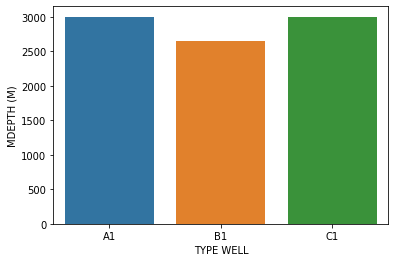

In [10]:
sns.barplot(x='TYPE WELL',y='MDEPTH (M)',data=coba)

## Pre-Process Data

In [11]:
df = pd.DataFrame(data)

In [12]:
#drop unrellevant columns
df = df.drop(['CHECK'], axis = 1)
df = df.drop(['DATETIME'], axis = 1)
df = df.drop(['month_year'], axis = 1)

## Cleaning Columns Names
# rename
df = df.rename(columns={"Besar Lubang": "BIT_SIZE"})

# underscore columns from space
df.columns = df.columns.str.replace(" ", "_")

#changing type well into numerical columns
df = df.replace(to_replace='A1', value='1', regex=True)
df = df.replace(to_replace='B1', value='2', regex=True)
df = df.replace(to_replace='C1', value='3', regex=True)

#set type columns to integer
df['TYPE_WELL'] = df['TYPE_WELL'].astype('int64')
df['MDEPTH_(M)'] = df['MDEPTH_(M)'].astype('int64')
df['MTVD_(M)'] = df['MTVD_(M)'].astype('int64')
df['WOB_(Ton)'] = df['WOB_(Ton)'].astype('int64')
df['HKLD_(Ton)'] = df['HKLD_(Ton)'].astype('int64')
df['RPM'] = df['RPM'].astype('int64')
df['MFI_(GPM)'] = df['MFI_(GPM)'].astype('int64')
df['SPP_(Psi)'] = df['SPP_(Psi)'].astype('int64')
df['MWI__(sg)'] = df['MWI__(sg)'].astype('int64')
df['ROP1_(min/M)'] = df['ROP1_(min/M)'].astype('float64')

In [13]:
df.describe()

TYPE_WELL   MDEPTH_(M)     MTVD_(M)    WOB_(Ton)   HKLD_(Ton)  \
count  8624.000000  8624.000000  8624.000000  8624.000000  8624.000000   
mean      2.000464  1452.622333  1228.517509    10.361665    60.691558   
std       0.833041   837.910564   666.274004     3.746504    16.510307   
min       1.000000    10.000000    10.000000     0.000000    20.000000   
25%       1.000000   729.000000   698.750000     8.000000    48.000000   
50%       2.000000  1448.000000  1212.000000    10.000000    60.000000   
75%       3.000000  2166.250000  1749.000000    13.000000    73.000000   
max       3.000000  3003.000000  2570.000000    23.000000   103.000000   

               RPM         SCFM    MFI_(GPM)    SPP_(Psi)    MWI__(sg)  \
count  8624.000000  8624.000000  8624.000000  8624.000000  8624.000000   
mean     56.187964  1028.867115   845.115028  1669.168483     3.508117   
std      31.846554   725.401913    77.674504   391.103448     3.448322   
min       0.000000     0.000000   137.000000     0.000000     1.000000   
25%      49.000000     0.000000   800.000000  1480.000000     1.000000   
50%      60.000000  1200.000000   844.000000  1676.000000     1.000000   
75%      74.000000  1600.000000   898.000000  1979.250000     8.000000   
max     125.000000  2000.000000  1248.000000  2450.000000     9.000000   

       ROP1_(min/M)  
count   8624.000000  
mean       9.193667  
std        7.247439  
min        0.220000  
25%        5.200000  
50%        7.500000  
75%       11.500000  
max      215.700000

In [14]:
df.BIT_SIZE.value_counts()

12.25      2382
9875       2257
17.5       2064
26         1100
7875        728
36           73
8.5           6
8468          5
7-19/32       3
8-15/32       1
8-15/33       1
Name: BIT_SIZE, dtype: int64

In [15]:
# Remove Besar Lubang above 12.25 (36, 26, 17.25)
df_clean4 = df[df.BIT_SIZE != "7-19/32"]
df_clean5 = df_clean4[df_clean4.BIT_SIZE != "8-15/32"]
df_clean6 = df_clean5[df_clean5.BIT_SIZE != "8-15/33"]

# Rename Rows in Specified Column
df_clean6 = df_clean6.replace(to_replace=9875.00, value=9.875, regex=True)
df_clean6 = df_clean6.replace(to_replace=7875.00, value=7.875, regex=True)
df_clean6 = df_clean6.replace(to_replace=8468.00, value=8.468, regex=True)
df_clean6.BIT_SIZE.value_counts()

12.250    2382
9.875     2257
17.500    2064
26.000    1100
7.875      728
36.000      73
8.500        6
8.468        5
Name: BIT_SIZE, dtype: int64

In [16]:
df_clean = df_clean6
print(df_clean.info(), df_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8619 entries, 0 to 8623
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE_WELL     8619 non-null   int64  
 1   BIT_SIZE      8615 non-null   float64
 2   MDEPTH_(M)    8619 non-null   int64  
 3   MTVD_(M)      8619 non-null   int64  
 4   WOB_(Ton)     8619 non-null   int64  
 5   HKLD_(Ton)    8619 non-null   int64  
 6   RPM           8619 non-null   int64  
 7   SCFM          8619 non-null   int64  
 8   MFI_(GPM)     8619 non-null   int64  
 9   SPP_(Psi)     8619 non-null   int64  
 10  MWI__(sg)     8619 non-null   int64  
 11  ROP1_(min/M)  8619 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 875.4 KB
None (8619, 12)


In [17]:
df_clean.describe()

TYPE_WELL     BIT_SIZE   MDEPTH_(M)     MTVD_(M)    WOB_(Ton)  \
count  8619.000000  8615.000000  8619.000000  8619.000000  8619.000000   
mean      1.999884    14.467988  1452.171714  1228.097691    10.365240   
std       0.832935     5.806994   837.862106   666.169799     3.744544   
min       1.000000     7.875000    10.000000    10.000000     0.000000   
25%       1.000000     9.875000   729.000000   698.000000     8.000000   
50%       2.000000    12.250000  1447.000000  1211.000000    10.000000   
75%       3.000000    17.500000  2166.000000  1749.000000    13.000000   
max       3.000000    36.000000  3003.000000  2570.000000    23.000000   

        HKLD_(Ton)          RPM         SCFM    MFI_(GPM)    SPP_(Psi)  \
count  8619.000000  8619.000000  8619.000000  8619.000000  8619.000000   
mean     60.678849    56.191902  1029.463975   845.438102  1670.075763   
std      16.504319    31.855296   725.188744    76.524413   389.395960   
min      20.000000     0.000000     0.000000   137.000000     0.000000   
25%      48.000000    49.000000     0.000000   800.000000  1480.000000   
50%      60.000000    60.000000  1200.000000   844.000000  1677.000000   
75%      73.000000    74.000000  1600.000000   898.000000  1980.500000   
max     103.000000   125.000000  2000.000000  1248.000000  2450.000000   

         MWI__(sg)  ROP1_(min/M)  
count  8619.000000   8619.000000  
mean      3.505511      9.176132  
std       3.447624      7.207925  
min       1.000000      0.220000  
25%       1.000000      5.200000  
50%       1.000000      7.500000  
75%       8.000000     11.500000  
max       9.000000    215.700000

In [18]:
df_clean.shape

(8619, 12)

__Visualisasi__

In [19]:
df_val = df_clean[(df_clean['TYPE_WELL'] == 1)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


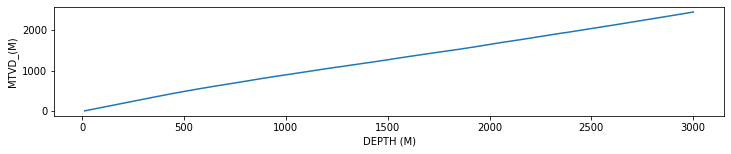

In [20]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 2))

# define x and y
x = df_val['MDEPTH_(M)']
y = df_val['MTVD_(M)']

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('DEPTH (M)')
# naming the y axis
plt.ylabel('MTVD_(M)')
  
# function to show the plot
plt.show()

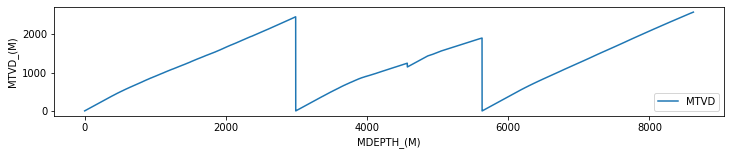

In [21]:
#Grafik MDEPTH dengan Variabel
plt.figure(figsize = (12,2))
rop = df_clean['MTVD_(M)']
line_chart1 = plt.plot(rop)
plt.xlabel('MDEPTH_(M)')
plt.ylabel('MTVD_(M)')
plt.legend(['MTVD'], loc=4)

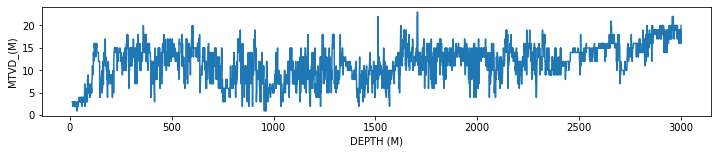

In [22]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 2))

# define x and y
x = df_val['MDEPTH_(M)']
y = df_val['WOB_(Ton)']

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('DEPTH (M)')
# naming the y axis
plt.ylabel('MTVD_(M)')
  
# function to show the plot
plt.show()

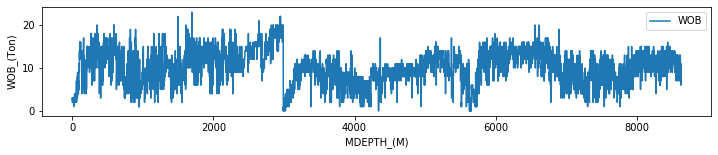

In [23]:
#Grafik MDEPTH dengan Variabel
plt.figure(figsize = (12,2))
rop = df_clean['WOB_(Ton)']
line_chart1 = plt.plot(rop)
plt.xlabel('MDEPTH_(M)')
plt.ylabel('WOB_(Ton)')
plt.legend(['WOB'], loc=1)

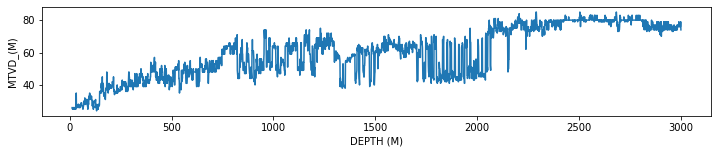

In [24]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 2))

# define x and y
x = df_val['MDEPTH_(M)']
y = df_val['HKLD_(Ton)']

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('DEPTH (M)')
# naming the y axis
plt.ylabel('MTVD_(M)')
  
# function to show the plot
plt.show()

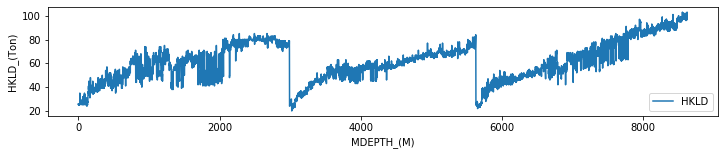

In [25]:
#Grafik MDEPTH dengan Variabel
plt.figure(figsize = (12,2))
rop = df_clean['HKLD_(Ton)']
line_chart1 = plt.plot(rop)
plt.xlabel('MDEPTH_(M)')
plt.ylabel('HKLD_(Ton)')
plt.legend(['HKLD'], loc=4)

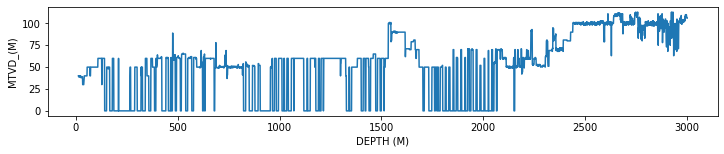

In [26]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 2))

# define x and y
x = df_val['MDEPTH_(M)']
y = df_val['RPM']

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('DEPTH (M)')
# naming the y axis
plt.ylabel('MTVD_(M)')
  
# function to show the plot
plt.show()

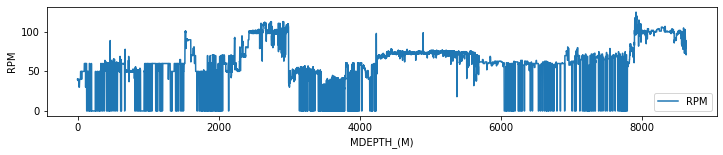

In [27]:
#Grafik MDEPTH dengan Variabel
plt.figure(figsize = (12,2))
rop = df_clean['RPM']
line_chart1 = plt.plot(rop)
plt.xlabel('MDEPTH_(M)')
plt.ylabel('RPM')
plt.legend(['RPM'], loc=4)

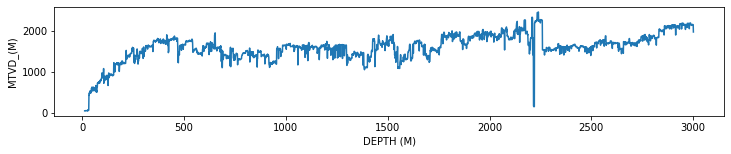

In [28]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 2))

# define x and y
x = df_val['MDEPTH_(M)']
y = df_val['SPP_(Psi)']

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('DEPTH (M)')
# naming the y axis
plt.ylabel('MTVD_(M)')
  
# function to show the plot
plt.show()

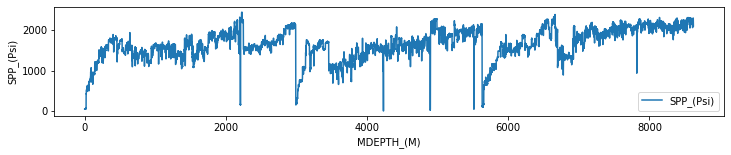

In [29]:
#Grafik MDEPTH dengan Variabel
plt.figure(figsize = (12,2))
rop = df_clean['SPP_(Psi)']
line_chart1 = plt.plot(rop)
plt.xlabel('MDEPTH_(M)')
plt.ylabel('SPP_(Psi)')
plt.legend(['SPP_(Psi)'], loc=4)

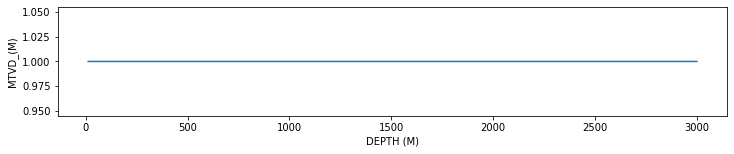

In [30]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 2))

# define x and y
x = df_val['MDEPTH_(M)']
y = df_val['MWI__(sg)']

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('DEPTH (M)')
# naming the y axis
plt.ylabel('MTVD_(M)')
  
# function to show the plot
plt.show()

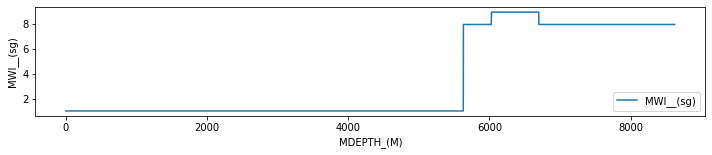

In [31]:
#Grafik MDEPTH dengan Variabel
plt.figure(figsize = (12,2))
rop = df_clean['MWI__(sg)']
line_chart1 = plt.plot(rop)
plt.xlabel('MDEPTH_(M)')
plt.ylabel('MWI__(sg)')
plt.legend(['MWI__(sg)'], loc=4)

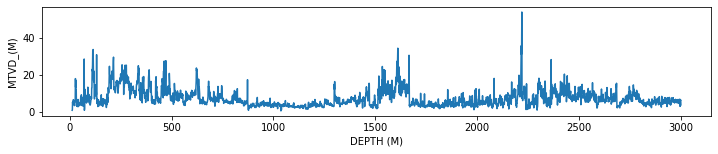

In [32]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 2))

# define x and y
x = df_val['MDEPTH_(M)']
y = df_val['ROP1_(min/M)']

# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('DEPTH (M)')
# naming the y axis
plt.ylabel('MTVD_(M)')
  
# function to show the plot
plt.show()

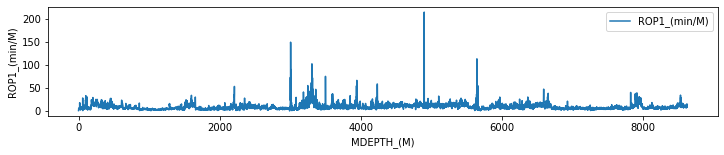

In [33]:
#Grafik MDEPTH dengan Variabel
plt.figure(figsize = (12,2))
rop = df_clean['ROP1_(min/M)']
line_chart1 = plt.plot(rop)
plt.xlabel('MDEPTH_(M)')
plt.ylabel('ROP1_(min/M)')
plt.legend(['ROP1_(min/M)'], loc=1)

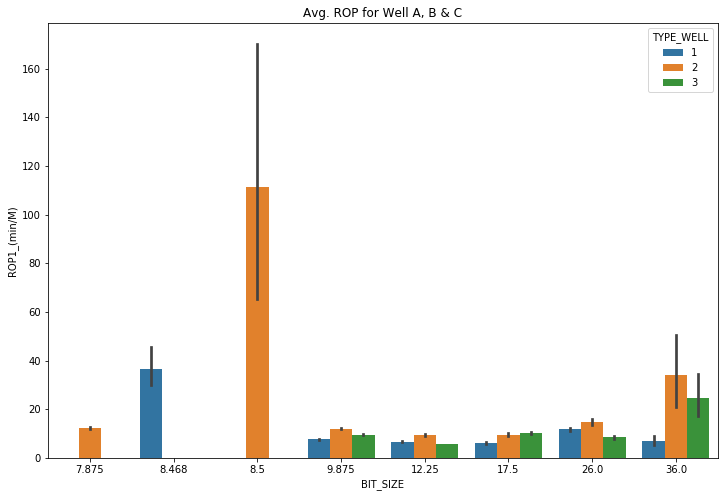

In [35]:
from numpy import mean
plt.figure(figsize=(12,8))

#x is bit size, y is count rop
sns.barplot(x='BIT_SIZE',y='ROP1_(min/M)', hue="TYPE_WELL", estimator=mean, data=df_clean)
plt.title("Avg. ROP for Well A, B & C")
plt.show()

#for index, value in enumerate(y):
    #plt.text(value, index, str(value))

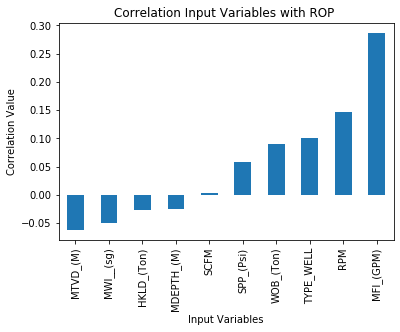

In [38]:
ax = df.corr(method='spearman')['ROP1_(min/M)'][:-1].sort_values().plot(kind='bar')
ax.set_title("Correlation Input Variables with ROP ")
ax.set_xlabel("Input Variables");
ax.set_ylabel("Correlation Value");

### Z Outlier Analysis
menghilangkan outlier pada ROP dan MFI

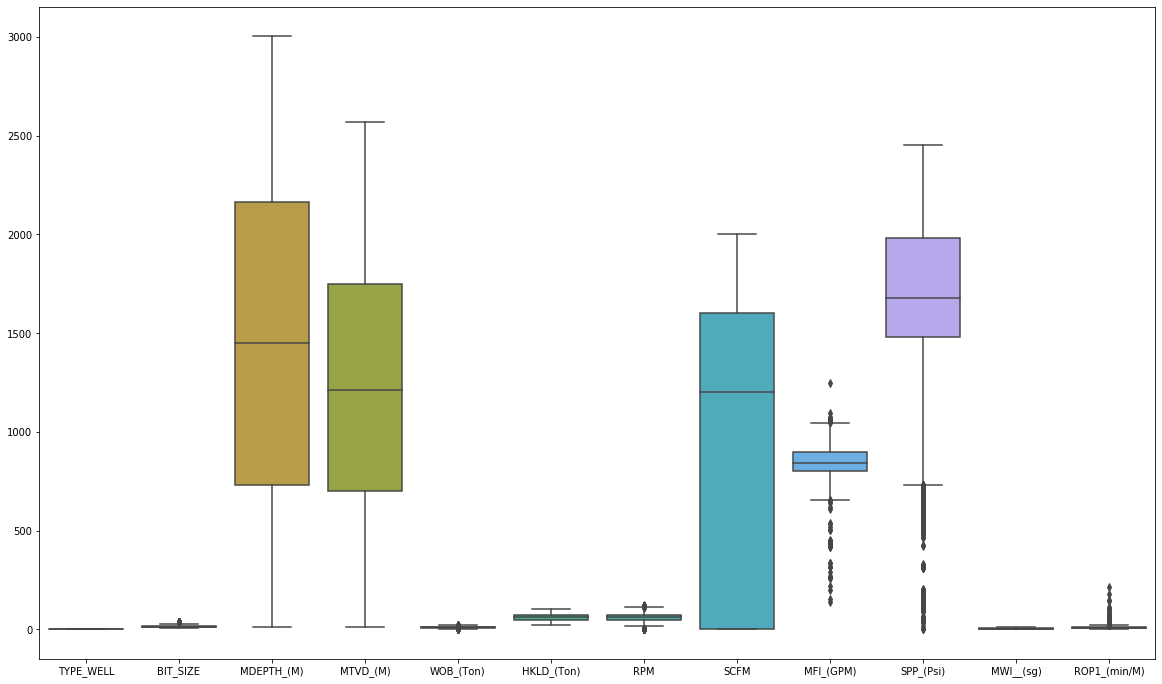

In [40]:
plt.figure(figsize=(20,12))
sns.boxplot(data = df_clean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


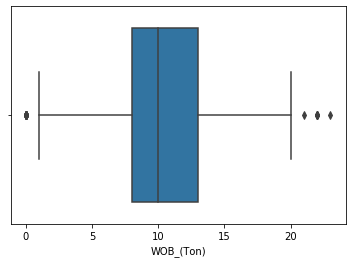

In [41]:
sns.boxplot('WOB_(Ton)', data = df_clean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


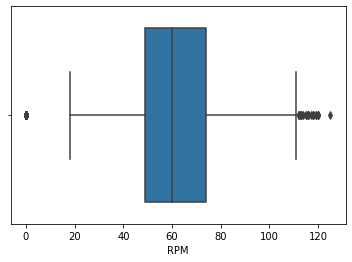

In [42]:
sns.boxplot('RPM', data = df_clean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


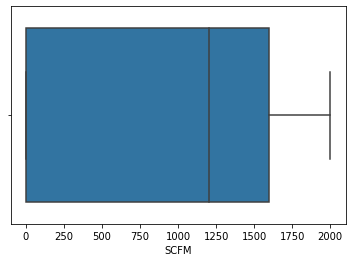

In [43]:
sns.boxplot('SCFM', data = df_clean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


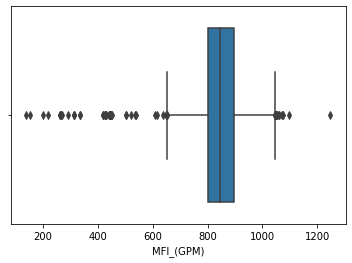

In [44]:
sns.boxplot('MFI_(GPM)', data = df_clean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


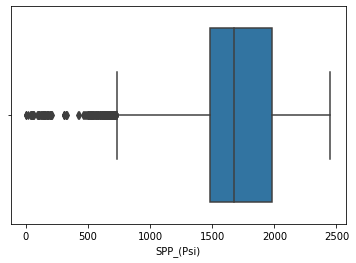

In [45]:
sns.boxplot('SPP_(Psi)', data = df_clean)

In [46]:
# Z Outlier Detection for WOB_(Ton)
upper = df_clean['WOB_(Ton)'].mean() + 3*df_clean['WOB_(Ton)'].std()
lower = df_clean['WOB_(Ton)'].mean()- 3*df_clean['WOB_(Ton)'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['WOB_(Ton)']<upper) & (df_clean['WOB_(Ton)']>lower)]

df_outlier['zscore'] = (df_outlier['WOB_(Ton)'] - df_outlier['WOB_(Ton)'].mean()) / df_outlier['WOB_(Ton)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TYPE_WELL  BIT_SIZE  MDEPTH_(M)  MTVD_(M)  WOB_(Ton)  HKLD_(Ton)  RPM  \
0          1      36.0          12        12          3          26   40   
1          1      36.0          13        13          3          26   39   
2          1      36.0          14        14          3          25   39   
3          1      36.0          15        15          2          26   40   
4          1      36.0          16        16          2          25   39   

   SCFM  MFI_(GPM)  SPP_(Psi)  MWI__(sg)  ROP1_(min/M)    zscore  
0     0        447         45          1           1.0 -1.971522  
1     0        441         45          1           1.4 -1.971522  
2     0        447         45          1           5.4 -1.971522  
3     0        444         50          1           4.4 -2.239549  
4     0        444         50          1           4.2 -2.239549

In [47]:
# Z Outlier Detection for RPM
upper = df_clean['RPM'].mean() + 3*df_clean['RPM'].std()
lower = df_clean['RPM'].mean()- 3*df_clean['RPM'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['RPM']<upper) & (df_clean['RPM']>lower)]

df_outlier['zscore'] = (df_outlier['RPM'] - df_outlier['RPM'].mean()) / df_outlier['RPM'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

TYPE_WELL  BIT_SIZE  MDEPTH_(M)  MTVD_(M)  WOB_(Ton)  HKLD_(Ton)  RPM  \
0          1      36.0          12        12          3          26   40   
1          1      36.0          13        13          3          26   39   
2          1      36.0          14        14          3          25   39   
3          1      36.0          15        15          2          26   40   
4          1      36.0          16        16          2          25   39   

   SCFM  MFI_(GPM)  SPP_(Psi)  MWI__(sg)  ROP1_(min/M)    zscore  
0     0        447         45          1           1.0 -0.508295  
1     0        441         45          1           1.4 -0.539687  
2     0        447         45          1           5.4 -0.539687  
3     0        444         50          1           4.4 -0.508295  
4     0        444         50          1           4.2 -0.539687

In [48]:
# Z Outlier Detection for SCFM
upper = df_clean['SCFM'].mean() + 3*df_clean['SCFM'].std()
lower = df_clean['SCFM'].mean()- 3*df_clean['SCFM'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['SCFM']<upper) & (df_clean['SCFM']>lower)]

df_outlier['zscore'] = (df_outlier['SCFM'] - df_outlier['SCFM'].mean()) / df_outlier['SCFM'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

TYPE_WELL  BIT_SIZE  MDEPTH_(M)  MTVD_(M)  WOB_(Ton)  HKLD_(Ton)  RPM  \
0          1      36.0          12        12          3          26   40   
1          1      36.0          13        13          3          26   39   
2          1      36.0          14        14          3          25   39   
3          1      36.0          15        15          2          26   40   
4          1      36.0          16        16          2          25   39   

   SCFM  MFI_(GPM)  SPP_(Psi)  MWI__(sg)  ROP1_(min/M)    zscore  
0     0        447         45          1           1.0 -1.419581  
1     0        441         45          1           1.4 -1.419581  
2     0        447         45          1           5.4 -1.419581  
3     0        444         50          1           4.4 -1.419581  
4     0        444         50          1           4.2 -1.419581

In [49]:
# Z Outlier Detection for MFI_(GPM)
upper = df_clean['MFI_(GPM)'].mean() + 3*df_clean['MFI_(GPM)'].std()
lower = df_clean['MFI_(GPM)'].mean()- 3*df_clean['MFI_(GPM)'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['MFI_(GPM)']<upper) & (df_clean['MFI_(GPM)']>lower)]

df_outlier['zscore'] = (df_outlier['MFI_(GPM)'] - df_outlier['MFI_(GPM)'].mean()) / df_outlier['MFI_(GPM)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TYPE_WELL  BIT_SIZE  MDEPTH_(M)  MTVD_(M)  WOB_(Ton)  HKLD_(Ton)  RPM  \
21          1      26.0          33        33          2          26   30   
22          1      26.0          34        34          1          27   30   
23          1      26.0          35        35          1          27   30   
24          1      26.0          36        36          1          26   30   
25          1      26.0          37        37          2          27   30   

    SCFM  MFI_(GPM)  SPP_(Psi)  MWI__(sg)  ROP1_(min/M)    zscore  
21     0        696        427          1           3.5 -2.194258  
22     0        688        422          1           4.0 -2.310048  
23     0        691        483          1           4.2 -2.266626  
24     0        694        461          1           3.1 -2.223205  
25     0        832        516          1           3.2 -0.225829

In [50]:
# Z Outlier Detection for SPP_(Psi)
upper = df_clean['SPP_(Psi)'].mean() + 3*df_clean['SPP_(Psi)'].std()
lower = df_clean['SPP_(Psi)'].mean()- 3*df_clean['SPP_(Psi)'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['SPP_(Psi)']<upper) & (df_clean['SPP_(Psi)']>lower)]

df_outlier['zscore'] = (df_outlier['SPP_(Psi)'] - df_outlier['SPP_(Psi)'].mean()) / df_outlier['SPP_(Psi)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TYPE_WELL  BIT_SIZE  MDEPTH_(M)  MTVD_(M)  WOB_(Ton)  HKLD_(Ton)  RPM  \
36          1      26.0          48        48          3          27   40   
42          1      26.0          54        54          3          28   40   
55          1      26.0          67        67          4          27   50   
61          1      26.0          73        73          7          28   50   
62          1      26.0          74        74          2          32   50   

    SCFM  MFI_(GPM)  SPP_(Psi)  MWI__(sg)  ROP1_(min/M)    zscore  
36     0        811        624          1           5.1 -2.981850  
42     0        791        620          1           8.1 -2.993068  
55     0        829        661          1           3.3 -2.878087  
61     0        826        626          1           2.0 -2.976241  
62     0        755        628          1          12.3 -2.970632

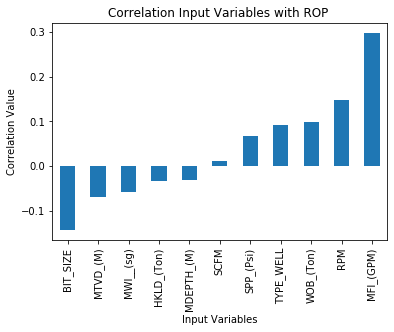

In [92]:
ax = df_new.corr(method='spearman')['ROP1_(min/M)'][:-1].sort_values().plot(kind='bar')
ax.set_title("Correlation Input Variables with ROP ")
ax.set_xlabel("Input Variables");
ax.set_ylabel("Correlation Value");

In [93]:
df_new.corr(method='spearman')['ROP1_(min/M)'][:-1].sort_values()

BIT_SIZE     -0.143623
MTVD_(M)     -0.069273
MWI__(sg)    -0.057336
HKLD_(Ton)   -0.033314
MDEPTH_(M)   -0.030190
SCFM          0.010517
SPP_(Psi)     0.066606
TYPE_WELL     0.091361
WOB_(Ton)     0.098225
RPM           0.148272
MFI_(GPM)     0.298089
Name: ROP1_(min/M), dtype: float64

In [55]:
df_new = df_new.drop(['zscore'], axis = 1)

In [56]:
df_new.describe()

TYPE_WELL     BIT_SIZE   MDEPTH_(M)     MTVD_(M)    WOB_(Ton)  \
count  8475.000000  8475.000000  8475.000000  8475.000000  8475.000000   
mean      2.003776    14.214086  1472.697345  1245.617463    10.499941   
std       0.833415     5.412445   825.784390   654.908209     3.622478   
min       1.000000     7.875000    34.000000    34.000000     0.000000   
25%       1.000000     9.875000   760.000000   724.000000     8.000000   
50%       2.000000    12.250000  1467.000000  1223.000000    11.000000   
75%       3.000000    17.500000  2175.000000  1755.000000    13.000000   
max       3.000000    26.000000  3003.000000  2570.000000    23.000000   

        HKLD_(Ton)          RPM         SCFM    MFI_(GPM)    SPP_(Psi)  \
count  8475.000000  8475.000000  8475.000000  8475.000000  8475.000000   
mean     61.187139    56.379115  1046.955752   847.883894  1693.372507   
std      16.078501    32.046953   718.693339    69.492377   347.759891   
min      21.000000     0.000000     0.000000   502.000000   620.000000   
25%      49.000000    50.000000     0.000000   801.000000  1492.000000   
50%      61.000000    61.000000  1200.000000   845.000000  1685.000000   
75%      73.000000    74.000000  1600.000000   899.000000  1987.000000   
max     103.000000   125.000000  2000.000000  1248.000000  2450.000000   

         MWI__(sg)  ROP1_(min/M)  
count  8475.000000   8475.000000  
mean      3.523304      8.979126  
std       3.454245      5.663334  
min       1.000000      0.700000  
25%       1.000000      5.200000  
50%       1.000000      7.500000  
75%       8.000000     11.400000  
max       9.000000    102.900000

In [57]:
df_new['ROP1_(min/M)'] = df_new['ROP1_(min/M)'].astype('int64')

__Train Test Split__

In [58]:
df_nor = df_new
df_nor.columns

Index(['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)'],
      dtype='object')

In [59]:
df_nor.shape

(8475, 12)

In [60]:
# Features
X = df_nor[['TYPE_WELL','BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)']].values

# Label
y = df_nor['ROP1_(min/M)'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle = None)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

In [61]:
print(X_train.shape, y_train.shape)

(5932, 11) (5932,)


In [62]:
print(X_test.shape, y_test.shape)

(2543, 11) (2543,)


In [63]:
print(X_val.shape, y_val.shape)

(1187, 11) (1187,)


### Normalize All Columns
Membuat perataan nilai dari 0 hingga 1

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

print((X_train.shape), 
      (X_test.shape),
      (X_val.shape))

(5932, 11) (2543, 11) (1187, 11)


In [65]:
X = pd.DataFrame(X_train)

X

0         1         2         3         4         5         6     7   \
0     0.0  0.110345  0.981812  0.934937  0.857143  0.670732  0.666667  0.70   
1     1.0  0.241379  0.421354  0.450710  0.428571  0.426829  0.583333  0.00   
2     0.5  0.241379  0.336140  0.348580  0.333333  0.402439  0.500000  0.50   
3     0.5  0.110345  0.445941  0.424290  0.285714  0.451220  0.600000  0.70   
4     0.0  0.531034  0.138767  0.160489  0.571429  0.268293  0.508333  0.00   
...   ...       ...       ...       ...       ...       ...       ...   ...   
5927  0.5  0.000000  0.661502  0.582413  0.428571  0.573171  0.616667  0.75   
5928  0.5  0.000000  0.841698  0.708991  0.523810  0.597561  0.625000  0.90   
5929  1.0  0.241379  0.405187  0.435331  0.523810  0.402439  0.500000  0.00   
5930  1.0  0.110345  0.956551  0.960962  0.523810  0.926829  0.808333  0.80   
5931  1.0  0.241379  0.497474  0.523659  0.190476  0.585366  0.541667  0.70   

            8         9      10  
0     0.482574  0.848634  0.000  
1     0.445040  0.361202  0.875  
2     0.442359  0.548087  0.000  
3     0.538874  0.462295  0.000  
4     0.595174  0.648634  0.000  
...        ...       ...    ...  
5927  0.536193  0.894536  0.000  
5928  0.462466  0.793989  0.000  
5929  0.332440  0.455191  0.875  
5930  0.469169  0.886339  0.875  
5931  0.402145  0.727322  0.875  

[5932 rows x 11 columns]

# Pembentukan Model

Pencarian Grid & Pembangunan JST-PB

* Hidden Neurons: 60
* Optimization : Adam
* Fungsi Aktivasi: RLU

__Parameter Tuning: Pencarian Grid__

In [65]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

__1 jam__

In [97]:
#PENCARIAN OPTIMIZER 1000 epoch
def build_ann(optimizer):
    model = Sequential()
    model.add(Dense(11, activation = 'relu'))
    model.add(Dense(60, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
    return model

#create model
model = KerasClassifier(build_fn=build_ann)

#define the grid search
batch_size = [10, 25, 35]
epochs = [50,100,500, 1000]
optimizer = ['Adam','RMSprop','SGD']

param_grid = dict(batch_size=batch_size, epochs = epochs, optimizer=optimizer)

grid_search = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        scoring='accuracy',
                        cv=3)
grid_result=grid_search.fit(X_val, y_val)

grid_scores = grid_result.cv_results_
results_df = pd.DataFrame(grid_scores)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

Epoch 1/50
91/91 [==============================] - 0s 732us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 2/50
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 3/50
91/91 [==============================] - 0s 658us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 4/50
91/91 [==============================] - 0s 855us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 5/50
91/91 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 6/50
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 7/50
91/91 [==============================] - 0s 821us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 8/50
91/91 [==============================] - 0s 885us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 9/50
91/91 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 10/50
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accura

91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 12/50
91/91 [==============================] - 0s 888us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 13/50
91/91 [==============================] - 0s 953us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 14/50
91/91 [==============================] - 0s 964us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 15/50
91/91 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 16/50
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 17/50
91/91 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 18/50
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 19/50
91/91 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 20/50
91/91 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoc

Epoch 42/50
91/91 [==============================] - 0s 723us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 43/50
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 44/50
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 45/50
91/91 [==============================] - 0s 975us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 46/50
91/91 [==============================] - 0s 712us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 47/50
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 48/50
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 49/50
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 50/50
91/91 [==============================] - 0s 919us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 1/50
91/91 [==============================] - 0s 768us/step - loss: 88.6668 - ac

91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 3/50
91/91 [==============================] - 0s 971us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 4/50
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 5/50
91/91 [==============================] - 0s 849us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 6/50
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 7/50
91/91 [==============================] - 0s 690us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 8/50
91/91 [==============================] - 0s 932us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 9/50
91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 10/50
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 11/50
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022

Epoch 12/100
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 13/100
91/91 [==============================] - 0s 990us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 14/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 15/100
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 16/100
91/91 [==============================] - 0s 801us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 17/100
91/91 [==============================] - 0s 830us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 18/100
91/91 [==============================] - 0s 658us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 19/100
91/91 [==============================] - 0s 669us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 20/100
91/91 [==============================] - 0s 669us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 21/100
91/91 [==============================] - 0s 800us/step - loss:

91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 71/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 72/100
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 73/100
91/91 [==============================] - 0s 932us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 74/100
91/91 [==============================] - 0s 849us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 75/100
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 76/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 77/100
91/91 [==============================] - 0s 855us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 78/100
91/91 [==============================] - 0s 712us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 79/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accura

91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 31/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 32/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011- ETA: 0s - loss: 68.5800 - accuracy: 0.0025  
Epoch 33/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 34/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 35/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 36/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 37/100
91/91 [==============================] - 0s 932us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 38/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 39/100
91/91 [==============================] - 0s

91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 91/100
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 92/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 93/100
91/91 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 94/100
91/91 [==============================] - 0s 953us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 95/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 96/100
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 97/100
91/91 [==============================] - 0s 954us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 98/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 99/100
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy

91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 51/100
91/91 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 52/100
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 53/100
91/91 [==============================] - 0s 992us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 54/100
91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 55/100
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 56/100
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 57/100
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 58/100
91/91 [==============================] - 0s 921us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 59/100
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accu

91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 31/100
91/91 [==============================] - 0s 877us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 32/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 33/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 34/100
91/91 [==============================] - 0s 820us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 35/100
91/91 [==============================] - 0s 888us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 36/100
91/91 [==============================] - 0s 780us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 37/100
91/91 [==============================] - 0s 835us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 38/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 39/100
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy

91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 90/500
91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 91/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 92/500
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 93/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 94/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 95/500
91/91 [==============================] - 0s 887us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 96/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 97/500
91/91 [==============================] - 0s 954us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 98/500
91/91 [==============================] - 0s 943us/step - loss: 85.4580 - accura

91/91 [==============================] - 0s 888us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 248/500
91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 249/500
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 250/500
91/91 [==============================] - 0s 817us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 251/500
91/91 [==============================] - 0s 855us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 252/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 253/500
91/91 [==============================] - 0s 899us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 254/500
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 255/500
91/91 [==============================] - 0s 953us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 256/500
91/91 [==============================] - 0s 1ms/step - loss: 85.45

91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 405/500
91/91 [==============================] - 0s 932us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 406/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 407/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 408/500
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 409/500
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 410/500
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 411/500
91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 412/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 413/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 -

91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 63/500
91/91 [==============================] - 0s 820us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 64/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 65/500
91/91 [==============================] - 0s 901us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 66/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 67/500
91/91 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 68/500
91/91 [==============================] - 0s 855us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 69/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 70/500
91/91 [==============================] - 0s 975us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 71/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy

91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 142/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 143/500
91/91 [==============================] - 0s 910us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 144/500
91/91 [==============================] - 0s 910us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 145/500
91/91 [==============================] - 0s 997us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 146/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 147/500
91/91 [==============================] - 0s 880us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 148/500
91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 149/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 150/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754

91/91 [==============================] - 0s 986us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 300/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 301/500
91/91 [==============================] - 0s 833us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 302/500
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 303/500
91/91 [==============================] - 0s 954us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 304/500
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 305/500
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 306/500
91/91 [==============================] - 0s 953us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 307/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 308/500
91/91 [==============================] - 0s 802us/step - loss: 78.77

91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 457/500
91/91 [==============================] - 0s 807us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 458/500
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 459/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 460/500
91/91 [==============================] - 0s 986us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 461/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 462/500
91/91 [==============================] - 0s 803us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 463/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 464/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 465/500
91/91 [==============================] - 0s 833us/step - loss: 78.

91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 115/500
91/91 [==============================] - 0s 975us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 116/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 117/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 118/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 119/500
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 120/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 121/500
91/91 [==============================] - 0s 881us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 122/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 123/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - acc

91/91 [==============================] - 0s 746us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 272/500
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 273/500
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 274/500
91/91 [==============================] - 0s 712us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 275/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 276/500
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 277/500
91/91 [==============================] - 0s 910us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 278/500
91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 279/500
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 280/500
91/91 [==============================] - 0s 964us/step - loss: 8

91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 430/500
91/91 [==============================] - 0s 932us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 431/500
91/91 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 432/500
91/91 [==============================] - 0s 824us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 433/500
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 434/500
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 435/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 436/500
91/91 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 437/500
91/91 [==============================] - 0s 964us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 438/500
91/91 [==============================] - 0s 833us/step - loss: 83.

91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 85/500
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 86/500
91/91 [==============================] - 0s 866us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 87/500
91/91 [==============================] - 0s 975us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 88/500
91/91 [==============================] - 0s 866us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 89/500
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 90/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 91/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 92/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 93/500
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - ac

91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 243/500
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 244/500
91/91 [==============================] - 0s 964us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 245/500
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 246/500
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 247/500
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 248/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 249/500
91/91 [==============================] - 0s 866us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 250/500
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 251/500
91/91 [==============================] - 0s 789us/step - loss: 85.

91/91 [==============================] - 0s 763us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 322/500
91/91 [==============================] - 0s 727us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 323/500
91/91 [==============================] - 0s 918us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 324/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 325/500
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 326/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 327/500
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 328/500
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 329/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 330/500
91/91 [==============================] - 0s 839us/step - loss: 8

91/91 [==============================] - 0s 773us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 401/500
91/91 [==============================] - 0s 723us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 402/500
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 403/500
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 404/500
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 405/500
91/91 [==============================] - 0s 829us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 406/500
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 407/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 408/500
91/91 [==============================] - 0s 888us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 409/500
91/91 [==============================] - 0s 910us/step - loss: 85.

91/91 [==============================] - 0s 910us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 59/500
91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 60/500
91/91 [==============================] - 0s 867us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 61/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 62/500
91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 63/500
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 64/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 65/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 66/500
91/91 [==============================] - 0s 791us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 67/500
91/91 [==============================] - 0s 866us/step - loss: 78.7754 - accu

91/91 [==============================] - 0s 779us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 217/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 218/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 219/500
91/91 [==============================] - 0s 866us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 220/500
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 221/500
91/91 [==============================] - 0s 855us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 222/500
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 223/500
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 224/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 225/500
91/91 [==============================] - 0s 789us/step - loss: 78.

91/91 [==============================] - 0s 834us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 296/500
91/91 [==============================] - 0s 774us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 297/500
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 298/500
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 299/500
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 300/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 301/500
91/91 [==============================] - 0s 833us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 302/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 303/500
91/91 [==============================] - 0s 801us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 304/500
91/91 [==============================] - 0s 789us/step - loss: 7

91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 375/500
91/91 [==============================] - 0s 866us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 376/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 377/500
91/91 [==============================] - 0s 929us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 378/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 379/500
91/91 [==============================] - 0s 883us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 380/500
91/91 [==============================] - 0s 773us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 381/500
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 382/500
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 383/500
91/91 [==============================] - 0s 778us/step - loss: 78.77

91/91 [==============================] - 0s 819us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 454/500
91/91 [==============================] - 0s 888us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 455/500
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 456/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 457/500
91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 458/500
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 459/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 460/500
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 461/500
91/91 [==============================] - 0s 953us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 462/500
91/91 [==============================] - 0s 1ms/step - loss: 78.

91/91 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 112/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 113/500
91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 114/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 115/500
91/91 [==============================] - 0s 773us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 116/500
91/91 [==============================] - 0s 760us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 117/500
91/91 [==============================] - 0s 786us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 118/500
91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 119/500
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 120/500
91/91 [==============================] - 0s 800us/step - loss: 8

91/91 [==============================] - 0s 893us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 269/500
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 270/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 271/500
91/91 [==============================] - 0s 954us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 272/500
91/91 [==============================] - 0s 813us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 273/500
91/91 [==============================] - 0s 904us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 274/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 275/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 276/500
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 277/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 -

91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 427/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 428/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 429/500
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 430/500
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 431/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 432/500
91/91 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 433/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 434/500
91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 435/500
91/91 [==============================] - 0s 997us/step - loss: 83.

91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 85/500
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 86/500
91/91 [==============================] - 0s 751us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 87/500
91/91 [==============================] - 0s 734us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 88/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 89/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 90/500
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 91/500
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 92/500
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 93/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - 

91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 164/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 165/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 166/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 167/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 168/500
91/91 [==============================] - 0s 828us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 169/500
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 170/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 171/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 172/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580

91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 243/500
91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 244/500
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 245/500
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 246/500
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 247/500
91/91 [==============================] - 0s 832us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 248/500
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 249/500
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 250/500
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 251/500
91/91 [==============================] - 0s 789us/step - loss: 8

91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 322/500
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 323/500
91/91 [==============================] - 0s 997us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 324/500
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 325/500
91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 326/500
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 327/500
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 328/500
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 329/500
91/91 [==============================] - 0s 877us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 330/500
91/91 [==============================] - 0s 844us/step - loss: 8

91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 479/500
91/91 [==============================] - 0s 975us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 480/500
91/91 [==============================] - 0s 921us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 481/500
91/91 [==============================] - 0s 899us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 482/500
91/91 [==============================] - 0s 953us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 483/500
91/91 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 484/500
91/91 [==============================] - 0s 899us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 485/500
91/91 [==============================] - 0s 855us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 486/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 487/500
91/91 [==============================] - 0s 1ms/step - loss: 85.4580

Epoch 136/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 137/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 138/500
91/91 [==============================] - 0s 833us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 139/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 140/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 141/500
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 142/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 143/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 144/500
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 145/500
91/91 [==============================] - 0s 833us/step - loss:

91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 216/500
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 217/500
91/91 [==============================] - 0s 953us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 218/500
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 219/500
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 220/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 221/500
91/91 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 222/500
91/91 [==============================] - 0s 975us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 223/500
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 224/500
91/91 [==============================] - 0s 833us/step - loss: 7

Epoch 294/500
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 295/500
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 296/500
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 297/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 298/500
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 299/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 300/500
91/91 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 301/500
91/91 [==============================] - 0s 975us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 302/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 303/500
91/91 [==============================] - 0s 789us/st

91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 452/500
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 453/500
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 454/500
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 455/500
91/91 [==============================] - 0s 910us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 456/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 457/500
91/91 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 458/500
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 459/500
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 460/500
91/91 [==============================] - 0s 818us/step - loss: 78.

91/91 [==============================] - 0s 877us/step - loss: 83.7212 - accuracy: 0.0022
Epoch 110/500
91/91 [==============================] - 0s 731us/step - loss: 83.7212 - accuracy: 0.0022
Epoch 111/500
91/91 [==============================] - 0s 723us/step - loss: 83.7212 - accuracy: 0.0022
Epoch 112/500
91/91 [==============================] - 0s 778us/step - loss: 83.7220 - accuracy: 0.0022
Epoch 113/500
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 114/500
91/91 [==============================] - 0s 975us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 115/500
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 116/500
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 117/500
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 118/500
91/91 [==============================] - 0s 771us/step - loss: 8

91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 189/500
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 190/500
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 191/500
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 192/500
91/91 [==============================] - 0s 803us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 193/500
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 194/500
91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 195/500
91/91 [==============================] - 0s 926us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 196/500
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 197/500
91/91 [==============================] - 0s 1ms/step - loss: 83.79

91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 268/500
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 269/500
91/91 [==============================] - 0s 757us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 270/500
91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 271/500
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 272/500
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 273/500
91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 274/500
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 275/500
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 276/500
91/91 [==============================] - 0s 800us/step - loss: 8

91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 426/500
91/91 [==============================] - 0s 828us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 427/500
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 428/500
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 429/500
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 430/500
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 431/500
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 432/500
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 433/500
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 434/500
91/91 [==============================] - 0s 800us/step - loss: 8

91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 5/1000
91/91 [==============================] - 0s 734us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 6/1000
91/91 [==============================] - 0s 953us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 7/1000
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 8/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 9/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 10/1000
91/91 [==============================] - 0s 877us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 11/1000
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 12/1000
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 13/1000
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - 

91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 84/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 85/1000
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 86/1000
91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 87/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 88/1000
91/91 [==============================] - 0s 866us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 89/1000
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 90/1000
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 91/1000
91/91 [==============================] - 0s 899us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 92/1000
91/91 [==============================] - 0s 800us/step - loss: 8

91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 240/1000
91/91 [==============================] - 0s 855us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 241/1000
91/91 [==============================] - 0s 962us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 242/1000
91/91 [==============================] - 0s 914us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 243/1000
91/91 [==============================] - 0s 865us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 244/1000
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 245/1000
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 246/1000
91/91 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 247/1000
91/91 [==============================] - 0s 855us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 248/1000
91/91 [==============================] - 0s 855us/step 

91/91 [==============================] - 0s 731us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 396/1000
91/91 [==============================] - 0s 515us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 397/1000
91/91 [==============================] - 0s 687us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 398/1000
91/91 [==============================] - 0s 687us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 399/1000
91/91 [==============================] - 0s 700us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 400/1000
91/91 [==============================] - 0s 687us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 401/1000
91/91 [==============================] - 0s 858us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 402/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 403/1000
91/91 [==============================] - 0s 858us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 404/1000
91/91 [==============================] - 0s 687us/step - 

91/91 [==============================] - 0s 786us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 551/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 552/1000
91/91 [==============================] - 0s 899us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 553/1000
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 554/1000
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 555/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 556/1000
91/91 [==============================] - 0s 813us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 557/1000
91/91 [==============================] - 0s 792us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 558/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 559/1000
91/91 [==============================] - 0s 1ms/step - lo

91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 707/1000
91/91 [==============================] - ETA: 0s - loss: 78.7070 - accuracy: 0.0042    - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 708/1000
91/91 [==============================] - 0s 805us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 709/1000
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 710/1000
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 711/1000
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 712/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 713/1000
91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 714/1000
91/91 [==============================] - 0s 910us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 715/1000
91/91 [==

91/91 [==============================] - 0s 829us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 862/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 863/1000
91/91 [==============================] - 0s 921us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 864/1000
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 865/1000
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 866/1000
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 867/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 868/1000
91/91 [==============================] - 0s 877us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 869/1000
91/91 [==============================] - 0s 822us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 870/1000
91/91 [==============================] - 0s 811us/step 

91/91 [==============================] - 0s 833us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 18/1000
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 19/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 20/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 21/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 22/1000
91/91 [==============================] - 0s 798us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 23/1000
91/91 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 24/1000
91/91 [==============================] - 0s 888us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 25/1000
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 26/1000
91/91 [==============================] - 0s 800us/step - loss: 78.7754

91/91 [==============================] - 0s 910us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 97/1000
91/91 [==============================] - 0s 855us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 98/1000
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 99/1000
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 100/1000
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 101/1000
91/91 [==============================] - 0s 769us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 102/1000
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 103/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 104/1000
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 105/1000
91/91 [==============================] - 0s 778us/step - l

91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 253/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 254/1000
91/91 [==============================] - 0s 803us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 255/1000
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 256/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 257/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 258/1000
91/91 [==============================] - 0s 833us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 259/1000
91/91 [==============================] - 0s 866us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 260/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 261/1000
91/91 [==============================] - 0s 767us/step 

91/91 [==============================] - 0s 975us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 409/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 410/1000
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 411/1000
91/91 [==============================] - 0s 888us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 412/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 413/1000
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 414/1000
91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 415/1000
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 416/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 417/1000
91/91 [==============================] - 0s 778us/step 

91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 564/1000
91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 565/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 566/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 567/1000
91/91 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 568/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 569/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 570/1000
91/91 [==============================] - 0s 866us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 571/1000
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 572/1000
91/91 [==============================] - 0s 1ms/step - loss

91/91 [==============================] - 0s 866us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 720/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 721/1000
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 722/1000
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 723/1000
91/91 [==============================] - 0s 772us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 724/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 725/1000
91/91 [==============================] - 0s 954us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 726/1000
91/91 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 727/1000
91/91 [==============================] - 0s 888us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 728/1000
91/91 [==============================] - 0s 811us/step 

91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 876/1000
91/91 [==============================] - 0s 923us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 877/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 878/1000
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 879/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 880/1000
91/91 [==============================] - 0s 910us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 881/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 882/1000
91/91 [==============================] - 0s 928us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 883/1000
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 884/1000
91/91 [==============================] - 0s 833us/step - lo

91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 32/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 33/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 34/1000
91/91 [==============================] - 0s 910us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 35/1000
91/91 [==============================] - 0s 855us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 36/1000
91/91 [==============================] - 0s 881us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 37/1000
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 38/1000
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 39/1000
91/91 [==============================] - 0s 807us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 40/1000
91/91 [==============================] - 0s 822us/step - loss: 83.7920

91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 111/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 112/1000
91/91 [==============================] - 0s 759us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 113/1000
91/91 [==============================] - 0s 748us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 114/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 115/1000
91/91 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 116/1000
91/91 [==============================] - 0s 866us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 117/1000
91/91 [==============================] - 0s 898us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 118/1000
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 119/1000
91/91 [==============================] - 0s 811us/step 

91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 267/1000
91/91 [==============================] - 0s 792us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 268/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 269/1000
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 270/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 271/1000
91/91 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 272/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 273/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 274/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 275/1000
91/91 [==============================] - 0s 822us/step - 

91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 423/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 424/1000
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 425/1000
91/91 [==============================] - 0s 889us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 426/1000
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 427/1000
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 428/1000
91/91 [==============================] - 0s 953us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 429/1000
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 430/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 431/1000
91/91 [==============================] - 0s 975us/step - 

91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 578/1000
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 579/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 580/1000
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 581/1000
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 582/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 583/1000
91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 584/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 585/1000
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 586/1000
91/91 [==============================] - 0s 844us/step - 

91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 733/1000
91/91 [==============================] - 0s 750us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 734/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 735/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 736/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 737/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 738/1000
91/91 [==============================] - 0s 910us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 739/1000
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 740/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 741/1000
91/91 [==============================] - 0s 778us/step 

91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 888/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 889/1000
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 890/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 891/1000
91/91 [==============================] - 0s 768us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 892/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 893/1000
91/91 [==============================] - 0s 822us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 894/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 895/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 896/1000
91/91 [==============================] - 0s 775us/step - lo

91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 44/1000
91/91 [==============================] - 0s 723us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 45/1000
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 46/1000
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 47/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 48/1000
91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 49/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 50/1000
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 51/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 52/1000
91/91 [==============================] - 0s 800us/step - loss: 8

91/91 [==============================] - 0s 400us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 199/1000
91/91 [==============================] - 0s 397us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 200/1000
91/91 [==============================] - 0s 404us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 201/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 202/1000
91/91 [==============================] - 0s 733us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 203/1000
91/91 [==============================] - 0s 584us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 204/1000
91/91 [==============================] - 0s 885us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 205/1000
91/91 [==============================] - 0s 592us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 206/1000
91/91 [==============================] - 0s 990us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 207/1000
91/91 [==============================] - 0s 1ms/step - lo

91/91 [==============================] - 0s 515us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 354/1000
91/91 [==============================] - 0s 587us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 355/1000
91/91 [==============================] - 0s 515us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 356/1000
91/91 [==============================] - 0s 587us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 357/1000
91/91 [==============================] - 0s 522us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 358/1000
91/91 [==============================] - 0s 580us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 359/1000
91/91 [==============================] - 0s 515us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 360/1000
91/91 [==============================] - 0s 415us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 361/1000
91/91 [==============================] - 0s 687us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 362/1000
91/91 [==============================] - 0s 415us/step 

91/91 [==============================] - 0s 550us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 510/1000
91/91 [==============================] - 0s 753us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 511/1000
91/91 [==============================] - 0s 399us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 512/1000
91/91 [==============================] - 0s 410us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 513/1000
91/91 [==============================] - 0s 401us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 514/1000
91/91 [==============================] - 0s 402us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 515/1000
91/91 [==============================] - 0s 401us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 516/1000
91/91 [==============================] - 0s 399us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 517/1000
91/91 [==============================] - 0s 378us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 518/1000
91/91 [==============================] - 0s 401us/step 

91/91 [==============================] - 0s 403us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 666/1000
91/91 [==============================] - 0s 779us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 667/1000
91/91 [==============================] - 0s 649us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 668/1000
91/91 [==============================] - 0s 680us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 669/1000
91/91 [==============================] - 0s 522us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 670/1000
91/91 [==============================] - 0s 411us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 671/1000
91/91 [==============================] - 0s 380us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 672/1000
91/91 [==============================] - 0s 404us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 673/1000
91/91 [==============================] - 0s 381us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 674/1000
91/91 [==============================] - 0s 406us/step 

91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 822/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 823/1000
91/91 [==============================] - 0s 994us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 824/1000
91/91 [==============================] - 0s 885us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 825/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 826/1000
91/91 [==============================] - 0s 910us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 827/1000
91/91 [==============================] - 0s 995us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 828/1000
91/91 [==============================] - 0s 995us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 829/1000
91/91 [==============================] - 0s 995us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 830/1000
91/91 [==============================] - 0s 995us/step - loss

91/91 [==============================] - 0s 464us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 978/1000
91/91 [==============================] - 0s 370us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 979/1000
91/91 [==============================] - 0s 399us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 980/1000
91/91 [==============================] - 0s 396us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 981/1000
91/91 [==============================] - 0s 401us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 982/1000
91/91 [==============================] - 0s 396us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 983/1000
91/91 [==============================] - 0s 400us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 984/1000
91/91 [==============================] - 0s 398us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 985/1000
91/91 [==============================] - 0s 402us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 986/1000
91/91 [==============================] - 0s 624us/step 

91/91 [==============================] - 0s 378us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 134/1000
91/91 [==============================] - 0s 637us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 135/1000
91/91 [==============================] - 0s 388us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 136/1000
91/91 [==============================] - 0s 400us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 137/1000
91/91 [==============================] - 0s 400us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 138/1000
91/91 [==============================] - 0s 410us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 139/1000
91/91 [==============================] - 0s 481us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 140/1000
91/91 [==============================] - 0s 409us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 141/1000
91/91 [==============================] - 0s 399us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 142/1000
91/91 [==============================] - 0s 402us/step 

91/91 [==============================] - 0s 856us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 290/1000
91/91 [==============================] - 0s 416us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 291/1000
91/91 [==============================] - 0s 406us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 292/1000
91/91 [==============================] - 0s 402us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 293/1000
91/91 [==============================] - 0s 401us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 294/1000
91/91 [==============================] - 0s 401us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 295/1000
91/91 [==============================] - 0s 378us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 296/1000
91/91 [==============================] - 0s 441us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 297/1000
91/91 [==============================] - 0s 549us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 298/1000
91/91 [==============================] - 0s 662us/step 

91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 446/1000
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 447/1000
91/91 [==============================] - 0s 921us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 448/1000
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 449/1000
91/91 [==============================] - 0s 813us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 450/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 451/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 452/1000
91/91 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 453/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 454/1000
91/91 [==============================] - 0s 1ms/step - loss: 78

91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 601/1000
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 602/1000
91/91 [==============================] - 0s 888us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 603/1000
91/91 [==============================] - 0s 723us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 604/1000
91/91 [==============================] - 0s 712us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 605/1000
91/91 [==============================] - 0s 953us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 606/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 607/1000
91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 608/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 609/1000
91/91 [==============================] - 0s 778us/step - 

91/91 [==============================] - 0s 983us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 757/1000
91/91 [==============================] - 0s 855us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 758/1000
91/91 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 759/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 760/1000
91/91 [==============================] - 0s 855us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 761/1000
91/91 [==============================] - 0s 888us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 762/1000
91/91 [==============================] - 0s 964us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 763/1000
91/91 [==============================] - 0s 828us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 764/1000
91/91 [==============================] - 0s 937us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 765/1000
91/91 [==============================] - 0s 997us/step - 

91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 913/1000
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 914/1000
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 915/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 916/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 917/1000
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 918/1000
91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 919/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 920/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 921/1000
91/91 [==============================] - 0s 715us/step - lo

91/91 [==============================] - 0s 723us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 69/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 70/1000
91/91 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 71/1000
91/91 [==============================] - 0s 679us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 72/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 73/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 74/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 75/1000
91/91 [==============================] - 0s 779us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 76/1000
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 77/1000
91/91 [==============================] - 0s 932us/step - loss: 83.79

91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 225/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 226/1000
91/91 [==============================] - 0s 992us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 227/1000
91/91 [==============================] - 0s 888us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 228/1000
91/91 [==============================] - 0s 690us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 229/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 230/1000
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 231/1000
91/91 [==============================] - 0s 964us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 232/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 233/1000
91/91 [==============================] - 0s 822us/step - 

91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 381/1000
91/91 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 382/1000
91/91 [==============================] - 0s 821us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 383/1000
91/91 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 384/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 385/1000
91/91 [==============================] - 0s 772us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 386/1000
91/91 [==============================] - 0s 882us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 387/1000
91/91 [==============================] - 0s 690us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 388/1000
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 389/1000
91/91 [==============================] - 0s 822us/step - 

91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 537/1000
91/91 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 538/1000
91/91 [==============================] - 0s 899us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 539/1000
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 540/1000
91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 541/1000
91/91 [==============================] - 0s 877us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 542/1000
91/91 [==============================] - 0s 712us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 543/1000
91/91 [==============================] - 0s 723us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 544/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 545/1000
91/91 [==============================] - 0s 833us/step 

91/91 [==============================] - 0s 871us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 693/1000
91/91 [==============================] - 0s 758us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 694/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 695/1000
91/91 [==============================] - 0s 866us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 696/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 697/1000
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 698/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 699/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 700/1000
91/91 [==============================] - 0s 690us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 701/1000
91/91 [==============================] - 0s 767us/step - lo

91/91 [==============================] - 0s 975us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 847/1000
91/91 [==============================] - 0s 723us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 848/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 849/1000
91/91 [==============================] - 0s 910us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 850/1000
91/91 [==============================] - 0s 877us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 851/1000
91/91 [==============================] - 0s 712us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 852/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 853/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 854/1000
91/91 [==============================] - 0s 712us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 855/1000
91/91 [==============================] - 0s 1ms/step - 

91/91 [==============================] - 0s 964us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 3/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 4/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 5/1000
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 6/1000
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 7/1000
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 8/1000
91/91 [==============================] - 0s 723us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 9/1000
91/91 [==============================] - 0s 723us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 10/1000
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 11/1000
91/91 [==============================] - 0s 811us/step - loss: 85.4580 - ac

91/91 [==============================] - 0s 734us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 160/1000
91/91 [==============================] - 0s 711us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 161/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 162/1000
91/91 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 163/1000
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 164/1000
91/91 [==============================] - 0s 711us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 165/1000
91/91 [==============================] - 0s 730us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 166/1000
91/91 [==============================] - 0s 725us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 167/1000
91/91 [==============================] - 0s 734us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 168/1000
91/91 [==============================] - 0s 745us/step - 

91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 315/1000
91/91 [==============================] - 0s 680us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 316/1000
91/91 [==============================] - 0s 723us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 317/1000
91/91 [==============================] - 0s 734us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 318/1000
91/91 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 319/1000
91/91 [==============================] - 0s 888us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 320/1000
91/91 [==============================] - 0s 981us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 321/1000
91/91 [==============================] - 0s 986us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 322/1000
91/91 [==============================] - 0s 723us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 323/1000
91/91 [==============================] - 0s 701us/step 

91/91 [==============================] - 0s 833us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 471/1000
91/91 [==============================] - 0s 669us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 472/1000
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 473/1000
91/91 [==============================] - 0s 712us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 474/1000
91/91 [==============================] - 0s 760us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 475/1000
91/91 [==============================] - 0s 964us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 476/1000
91/91 [==============================] - 0s 921us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 477/1000
91/91 [==============================] - 0s 712us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 478/1000
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 479/1000
91/91 [==============================] - 0s 690us/step 

91/91 [==============================] - 0s 888us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 627/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 628/1000
91/91 [==============================] - 0s 921us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 629/1000
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 630/1000
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 631/1000
91/91 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 632/1000
91/91 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 633/1000
91/91 [==============================] - 0s 866us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 634/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 635/1000
91/91 [==============================] - 0s 1ms/step - loss

91/91 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 783/1000
91/91 [==============================] - 0s 953us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 784/1000
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 785/1000
91/91 [==============================] - 0s 723us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 786/1000
91/91 [==============================] - 0s 882us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 787/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 788/1000
91/91 [==============================] - 0s 953us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 789/1000
91/91 [==============================] - 0s 789us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 790/1000
91/91 [==============================] - 0s 778us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 791/1000
91/91 [==============================] - 0s 745us/step - 

91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 938/1000
91/91 [==============================] - 0s 756us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 939/1000
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 940/1000
91/91 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 941/1000
91/91 [==============================] - 0s 734us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 942/1000
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 943/1000
91/91 [==============================] - 0s 767us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 944/1000
91/91 [==============================] - 0s 741us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 945/1000
91/91 [==============================] - 0s 877us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 946/1000
91/91 [==============================] - 0s 789us/step - 

91/91 [==============================] - 0s 723us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 93/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 94/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 95/1000
91/91 [==============================] - 0s 723us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 96/1000
91/91 [==============================] - 0s 751us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 97/1000
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 98/1000
91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 99/1000
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 100/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 101/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.

91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 249/1000
91/91 [==============================] - 0s 784us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 250/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 251/1000
91/91 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 252/1000
91/91 [==============================] - 0s 910us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 253/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 254/1000
91/91 [==============================] - 0s 855us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 255/1000
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 256/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 257/1000
91/91 [==============================] - 0s 778us/step - loss

91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 404/1000
91/91 [==============================] - 0s 828us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 405/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 406/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 407/1000
91/91 [==============================] - 0s 767us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 408/1000
91/91 [==============================] - 0s 866us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 409/1000
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 410/1000
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 411/1000
91/91 [==============================] - 0s 723us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 412/1000
91/91 [==============================] - 0s 811us/step - 

91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 560/1000
91/91 [==============================] - 0s 773us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 561/1000
91/91 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 562/1000
91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 563/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 564/1000
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 565/1000
91/91 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 566/1000
91/91 [==============================] - 0s 986us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 567/1000
91/91 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 568/1000
91/91 [==============================] - 0s 1ms/step - loss: 

91/91 [==============================] - 0s 745us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 716/1000
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 717/1000
91/91 [==============================] - 0s 723us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 718/1000
91/91 [==============================] - 0s 756us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 719/1000
91/91 [==============================] - 0s 800us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 720/1000
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 721/1000
91/91 [==============================] - 0s 779us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 722/1000
91/91 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 723/1000
91/91 [==============================] - 0s 811us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 724/1000
91/91 [==============================] - 0s 899us/step 

91/91 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 871/1000
91/91 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 872/1000
91/91 [==============================] - 0s 770us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 873/1000
91/91 [==============================] - 0s 921us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 874/1000
91/91 [==============================] - 0s 964us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 875/1000
91/91 [==============================] - 0s 833us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 876/1000
91/91 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 877/1000
91/91 [==============================] - 0s 899us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 878/1000
91/91 [==============================] - 0s 777us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 879/1000
91/91 [==============================] - 0s 778us/step 

91/91 [==============================] - 0s 910us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 27/1000
91/91 [==============================] - 0s 855us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 28/1000
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 29/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 30/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 31/1000
91/91 [==============================] - 0s 723us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 32/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 33/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 34/1000
91/91 [==============================] - 0s 806us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 35/1000
91/91 [==============================] - 0s 745us/step - loss: 8

91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 106/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 107/1000
91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 108/1000
91/91 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 109/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 110/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 111/1000
91/91 [==============================] - 0s 899us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 112/1000
91/91 [==============================] - 0s 986us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 113/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 114/1000
91/91 [==============================] - 0s 943us/step 

91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 261/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 262/1000
91/91 [==============================] - 0s 754us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 263/1000
91/91 [==============================] - 0s 815us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 264/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 265/1000
91/91 [==============================] - 0s 812us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 266/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 267/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 268/1000
91/91 [==============================] - 0s 723us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 269/1000
91/91 [==============================] - 0s 1ms/step - lo

91/91 [==============================] - 0s 743us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 416/1000
91/91 [==============================] - 0s 761us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 417/1000
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 418/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 419/1000
91/91 [==============================] - 0s 866us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 420/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 421/1000
91/91 [==============================] - 0s 792us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 422/1000
91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 423/1000
91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 424/1000
91/91 [==============================] - 0s 811us/step - 

91/91 [==============================] - 0s 800us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 572/1000
91/91 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 573/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 574/1000
91/91 [==============================] - 0s 723us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 575/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 576/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 577/1000
91/91 [==============================] - 0s 932us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 578/1000
91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 579/1000
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 580/1000
91/91 [==============================] - 0s 778us/step 

91/91 [==============================] - 0s 778us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 727/1000
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 728/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 729/1000
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 730/1000
91/91 [==============================] - 0s 756us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 731/1000
91/91 [==============================] - 0s 738us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 732/1000
91/91 [==============================] - 0s 745us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 733/1000
91/91 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 734/1000
91/91 [==============================] - 0s 855us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 735/1000
91/91 [==============================] - 0s 734us/step 

91/91 [==============================] - 0s 726us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 883/1000
91/91 [==============================] - 0s 871us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 884/1000
91/91 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 885/1000
91/91 [==============================] - 0s 899us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 886/1000
91/91 [==============================] - 0s 734us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 887/1000
91/91 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 888/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 889/1000
91/91 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 890/1000
91/91 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 891/1000
91/91 [==============================] - 0s 745us/step - lo

37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 40/50
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 41/50
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 42/50
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 43/50
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 44/50
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 45/50
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 46/50
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 47/50
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 48/50
37/37 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.

37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 50/50
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 1/50
37/37 [==============================] - 0s 896us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 2/50
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 3/50
37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 4/50
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 5/50
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 6/50
37/37 [==============================] - 0s 890us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 7/50
37/37 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 8/50
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoc

37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 8/50
37/37 [==============================] - 0s 647us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 9/50
37/37 [==============================] - 0s 809us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 10/50
37/37 [==============================] - 0s 674us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 11/50
37/37 [==============================] - 0s 674us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 12/50
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 13/50
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 14/50
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 15/50
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 16/50
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.

Epoch 67/100
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 68/100
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 69/100
37/37 [==============================] - 0s 761us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 70/100
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 71/100
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 72/100
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 73/100
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 74/100
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 75/100
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 76/100
37/37 [==============================] - 0s 793us/step - loss:

37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 26/100
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 27/100
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 28/100
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 29/100
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 30/100
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 31/100
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 32/100
37/37 [==============================] - 0s 769us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 33/100
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 34/100
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - 

37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 84/100
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 85/100
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 86/100
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 87/100
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 88/100
37/37 [==============================] - 0s 930us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 89/100
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 90/100
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 91/100
37/37 [==============================] - 0s 970us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 92/100
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - acc

37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 44/100
37/37 [==============================] - 0s 917us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 45/100
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 46/100
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 47/100
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 48/100
37/37 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 49/100
37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 50/100
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 51/100
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 52/100
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - acc

37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 24/100
37/37 [==============================] - 0s 647us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 25/100
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 26/100
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 27/100
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 28/100
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 29/100
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 30/100
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 31/100
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 32/100
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - ac

37/37 [==============================] - 0s 674us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 4/100
37/37 [==============================] - 0s 674us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 5/100
37/37 [==============================] - 0s 818us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 6/100
37/37 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 7/100
37/37 [==============================] - 0s 809us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 8/100
37/37 [==============================] - 0s 675us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 9/100
37/37 [==============================] - 0s 881us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 10/100
37/37 [==============================] - 0s 647us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 11/100
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 12/100
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accura

37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 63/100
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 64/100
37/37 [==============================] - 0s 916us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 65/100
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 66/100
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 67/100
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 68/100
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 69/100
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 70/100
37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 71/100
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.

37/37 [==============================] - 0s 755us/step - loss: 84.8554 - accuracy: 0.0055
Epoch 122/500
37/37 [==============================] - 0s 782us/step - loss: 84.7043 - accuracy: 0.0066
Epoch 123/500
37/37 [==============================] - 0s 755us/step - loss: 84.6698 - accuracy: 0.0066
Epoch 124/500
37/37 [==============================] - 0s 674us/step - loss: 84.6939 - accuracy: 0.0055
Epoch 125/500
37/37 [==============================] - 0s 970us/step - loss: 84.7396 - accuracy: 0.0066
Epoch 126/500
37/37 [==============================] - 0s 916us/step - loss: 84.6657 - accuracy: 0.0055
Epoch 127/500
37/37 [==============================] - 0s 1ms/step - loss: 84.6687 - accuracy: 0.0066
Epoch 128/500
37/37 [==============================] - 0s 1ms/step - loss: 84.7106 - accuracy: 0.0066
Epoch 129/500
37/37 [==============================] - 0s 809us/step - loss: 84.6558 - accuracy: 0.0066
Epoch 130/500
37/37 [==============================] - 0s 836us/step - loss: 84.68

37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 280/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 281/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 282/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 283/500
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 284/500
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 285/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 286/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 287/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 288/500
37/37 [==============================] - 0s 755us/step - loss: 85.

37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 438/500
37/37 [==============================] - 0s 674us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 439/500
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 440/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 441/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 442/500
37/37 [==============================] - 0s 970us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 443/500
37/37 [==============================] - 0s 997us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 444/500
37/37 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 445/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 446/500
37/37 [==============================] - 0s 943us/step - loss: 85.

37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 93/500
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 94/500
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 95/500
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 96/500
37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 97/500
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 98/500
37/37 [==============================] - 0s 997us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 99/500
37/37 [==============================] - 0s 809us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 100/500
37/37 [==============================] - 0s 788us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 101/500
37/37 [==============================] - 0s 890us/step - loss: 78.7754 

37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 250/500
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 251/500
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 252/500
37/37 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 253/500
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 254/500
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 255/500
37/37 [==============================] - 0s 862us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 256/500
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 257/500
37/37 [==============================] - 0s 771us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 258/500
37/37 [==============================] - 0s 1ms/step - loss: 78.7

37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 407/500
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 408/500
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 409/500
37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 410/500
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 411/500
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 412/500
37/37 [==============================] - 0s 890us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 413/500
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 414/500
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 415/500
37/37 [==============================] - 0s 782us/step - loss: 78.77

37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 65/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 66/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 67/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 68/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 69/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 70/500
37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 71/500
37/37 [==============================] - 0s 750us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 72/500
37/37 [==============================] - 0s 916us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 73/500
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy

37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 222/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 223/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 224/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 225/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 226/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 227/500
37/37 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 228/500
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 229/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 230/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920

37/37 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 380/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 381/500
37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 382/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 383/500
37/37 [==============================] - 0s 970us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 384/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 385/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 386/500
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 387/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 388/500
37/37 [==============================] - 0s 755us/step - loss: 83.79

37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 38/500
37/37 [==============================] - 0s 970us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 39/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 40/500
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 41/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 42/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 43/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 44/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 45/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 46/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - ac

37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 196/500
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 197/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 198/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 199/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 200/500
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 201/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 202/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 203/500
37/37 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 204/500
37/37 [==============================] - 0s 1ms/step - loss: 85.

37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 353/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 354/500
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 355/500
37/37 [==============================] - 0s 674us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 356/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 357/500
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 358/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 359/500
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 360/500
37/37 [==============================] - 0s 997us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 361/500
37/37 [==============================] - 0s 782us/step - loss: 8

37/37 [==============================] - 0s 970us/step - loss: 63.3438 - accuracy: 0.0044
Epoch 10/500
37/37 [==============================] - 0s 836us/step - loss: 60.3994 - accuracy: 0.0044
Epoch 11/500
37/37 [==============================] - 0s 863us/step - loss: 64.8820 - accuracy: 0.0044
Epoch 12/500
37/37 [==============================] - 0s 809us/step - loss: 65.2145 - accuracy: 0.0033
Epoch 13/500
37/37 [==============================] - 0s 674us/step - loss: 62.5016 - accuracy: 0.0044
Epoch 14/500
37/37 [==============================] - 0s 916us/step - loss: 60.8306 - accuracy: 0.0055
Epoch 15/500
37/37 [==============================] - 0s 674us/step - loss: 57.1865 - accuracy: 0.0055
Epoch 16/500
37/37 [==============================] - 0s 889us/step - loss: 58.5626 - accuracy: 0.0066
Epoch 17/500
37/37 [==============================] - 0s 782us/step - loss: 54.9490 - accuracy: 0.0066
Epoch 18/500
37/37 [==============================] - 0s 701us/step - loss: 57.3869 - 

37/37 [==============================] - 0s 782us/step - loss: 55.2401 - accuracy: 0.0055
Epoch 168/500
37/37 [==============================] - 0s 728us/step - loss: 54.6570 - accuracy: 0.0066
Epoch 169/500
37/37 [==============================] - 0s 809us/step - loss: 55.2374 - accuracy: 0.0066
Epoch 170/500
37/37 [==============================] - 0s 701us/step - loss: 54.6077 - accuracy: 0.0066
Epoch 171/500
37/37 [==============================] - 0s 999us/step - loss: 54.4598 - accuracy: 0.0066
Epoch 172/500
37/37 [==============================] - 0s 728us/step - loss: 54.4300 - accuracy: 0.0055
Epoch 173/500
37/37 [==============================] - 0s 809us/step - loss: 54.2859 - accuracy: 0.0066
Epoch 174/500
37/37 [==============================] - 0s 701us/step - loss: 55.0645 - accuracy: 0.0055
Epoch 175/500
37/37 [==============================] - 0s 863us/step - loss: 54.4189 - accuracy: 0.0066
Epoch 176/500
37/37 [==============================] - 0s 997us/step - loss: 5

37/37 [==============================] - 0s 997us/step - loss: 53.8408 - accuracy: 0.0066
Epoch 326/500
37/37 [==============================] - 0s 1ms/step - loss: 53.9194 - accuracy: 0.0066
Epoch 327/500
37/37 [==============================] - 0s 970us/step - loss: 53.4667 - accuracy: 0.0066
Epoch 328/500
37/37 [==============================] - 0s 890us/step - loss: 53.5572 - accuracy: 0.0066
Epoch 329/500
37/37 [==============================] - 0s 728us/step - loss: 54.0110 - accuracy: 0.0066
Epoch 330/500
37/37 [==============================] - 0s 863us/step - loss: 54.4497 - accuracy: 0.0066
Epoch 331/500
37/37 [==============================] - 0s 755us/step - loss: 53.7274 - accuracy: 0.0066
Epoch 332/500
37/37 [==============================] - 0s 809us/step - loss: 54.0157 - accuracy: 0.0066
Epoch 333/500
37/37 [==============================] - 0s 809us/step - loss: 53.4289 - accuracy: 0.0066
Epoch 334/500
37/37 [==============================] - 0s 782us/step - loss: 55.

37/37 [==============================] - 0s 2ms/step - loss: 16.6399 - accuracy: 0.0232
Epoch 484/500
37/37 [==============================] - 0s 1ms/step - loss: 16.0329 - accuracy: 0.0232
Epoch 485/500
37/37 [==============================] - 0s 1ms/step - loss: 16.6823 - accuracy: 0.0243
Epoch 486/500
37/37 [==============================] - 0s 1ms/step - loss: 16.1553 - accuracy: 0.0232
Epoch 487/500
37/37 [==============================] - 0s 916us/step - loss: 16.2410 - accuracy: 0.0243
Epoch 488/500
37/37 [==============================] - 0s 1ms/step - loss: 15.5471 - accuracy: 0.0232
Epoch 489/500
37/37 [==============================] - 0s 1ms/step - loss: 16.0646 - accuracy: 0.0243
Epoch 490/500
37/37 [==============================] - 0s 1ms/step - loss: 15.9250 - accuracy: 0.0232
Epoch 491/500
37/37 [==============================] - 0s 1ms/step - loss: 15.1123 - accuracy: 0.0243
Epoch 492/500
37/37 [==============================] - 0s 1ms/step - loss: 16.3307 - accuracy:

37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 142/500
37/37 [==============================] - 0s 889us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 143/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 144/500
37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 145/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 146/500
37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 147/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 148/500
37/37 [==============================] - 0s 868us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 149/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 150/500
37/37 [==============================] - 0s 863us/step - loss: 83.

37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 300/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 301/500
37/37 [==============================] - 0s 735us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 302/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 303/500
37/37 [==============================] - 0s 674us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 304/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 305/500
37/37 [==============================] - 0s 862us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 306/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 307/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 308/500
37/37 [==============================] - 0s 997us/step - loss: 83.79

37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 379/500
37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 380/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 381/500
37/37 [==============================] - 0s 893us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 382/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 383/500
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 384/500
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 385/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 386/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 387/500
37/37 [==============================] - 0s 943us/step - loss: 8

37/37 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 37/500
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 38/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 39/500
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 40/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 41/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 42/500
37/37 [==============================] - 0s 997us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 43/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 44/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 45/500
37/37 [==============================] - 0s 997us/step - loss: 85.4580 - accura

37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 195/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 196/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 197/500
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 198/500
37/37 [==============================] - 0s 970us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 199/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 200/500
37/37 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 201/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 202/500
37/37 [==============================] - 0s 997us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 203/500
37/37 [==============================] - 0s 1ms/step - loss: 85.4580

37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 353/500
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 354/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 355/500
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 356/500
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 357/500
37/37 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 358/500
37/37 [==============================] - 0s 935us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 359/500
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 360/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 361/500
37/37 [==============================] - 0s 970us/step - loss: 8

37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 432/500
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 433/500
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 434/500
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 435/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 436/500
37/37 [==============================] - 0s 847us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 437/500
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 438/500
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 439/500
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 440/500
37/37 [==============================] - 0s 916us/step - loss: 8

37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 90/500
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 91/500
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 92/500
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 93/500
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 94/500
37/37 [==============================] - 0s 809us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 95/500
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 96/500
37/37 [==============================] - 0s 822us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 97/500
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 98/500
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - 

37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 248/500
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 249/500
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 250/500
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 251/500
37/37 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 252/500
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 253/500
37/37 [==============================] - 0s 997us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 254/500
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 255/500
37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 256/500
37/37 [==============================] - 0s 701us/step - loss: 78.7

37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 405/500
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 406/500
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 407/500
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 408/500
37/37 [==============================] - 0s 809us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 409/500
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 410/500
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 411/500
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 412/500
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 413/500
37/37 [==============================] - 0s 728us/step - loss: 78.

37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 62/500
37/37 [==============================] - 0s 889us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 63/500
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 64/500
37/37 [==============================] - 0s 963us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 65/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 66/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 67/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 68/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 69/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 70/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accu

37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 220/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 221/500
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 222/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 223/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 224/500
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 225/500
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 226/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 227/500
37/37 [==============================] - 0s 715us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 228/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920

37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 299/500
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 300/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 301/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 302/500
37/37 [==============================] - 0s 674us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 303/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 304/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 305/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 306/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 307/500
37/37 [==============================] - 0s 863us/step - loss: 8

37/37 [==============================] - 0s 889us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 378/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 379/500
37/37 [==============================] - 0s 903us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 380/500
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 381/500
37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 382/500
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 383/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 384/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 385/500
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 386/500
37/37 [==============================] - 0s 728us/step - loss: 8

Epoch 456/500
37/37 [==============================] - 0s 916us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 457/500
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 458/500
37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 459/500
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 460/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 461/500
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 462/500
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 463/500
37/37 [==============================] - 0s 901us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 464/500
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 465/500
37/37 [==============================] - 0s 755us/st

37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 114/1000
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 115/1000
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 116/1000
37/37 [==============================] - 0s 889us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 117/1000
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 118/1000
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 119/1000
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 120/1000
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 121/1000
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 122/1000
37/37 [==============================] - 0s 1ms/step - 

37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 270/1000
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 271/1000
37/37 [==============================] - 0s 889us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 272/1000
37/37 [==============================] - 0s 674us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 273/1000
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 274/1000
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 275/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 276/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 277/1000
37/37 [==============================] - 0s 893us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 278/1000
37/37 [==============================] - 0s 809us/step - lo

37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 426/1000
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 427/1000
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 428/1000
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 429/1000
37/37 [==============================] - 0s 905us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 430/1000
37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 431/1000
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 432/1000
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 433/1000
37/37 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 434/1000
37/37 [==============================] - 0s 782us/step 

37/37 [==============================] - 0s 970us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 582/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 583/1000
37/37 [==============================] - 0s 970us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 584/1000
37/37 [==============================] - 0s 889us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 585/1000
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 586/1000
37/37 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 587/1000
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 588/1000
37/37 [==============================] - 0s 889us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 589/1000
37/37 [==============================] - 0s 701us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 590/1000
37/37 [==============================] - 0s 863us/step - 

37/37 [==============================] - 0s 916us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 738/1000
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 739/1000
37/37 [==============================] - 0s 997us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 740/1000
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 741/1000
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 742/1000
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 743/1000
37/37 [==============================] - 0s 890us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 744/1000
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 745/1000
37/37 [==============================] - 0s 863us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 746/1000
37/37 [==============================] - 0s 863us/step 

37/37 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 894/1000
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 895/1000
37/37 [==============================] - 0s 809us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 896/1000
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 897/1000
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 898/1000
37/37 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 899/1000
37/37 [==============================] - 0s 782us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 900/1000
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 901/1000
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 902/1000
37/37 [==============================] - 0s 809us/step 

37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 49/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 50/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 51/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 52/1000
37/37 [==============================] - 0s 997us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 53/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 54/1000
37/37 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 55/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 56/1000
37/37 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 57/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accur

37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 206/1000
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 207/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 208/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 209/1000
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 210/1000
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 211/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 212/1000
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 213/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 214/1000
37/37 [==============================] - 0s 1ms/step - lo

37/37 [==============================] - 0s 674us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 362/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 363/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 364/1000
37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 365/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 366/1000
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 367/1000
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 368/1000
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 369/1000
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 370/1000
37/37 [==============================] - 0s 836us/step - lo

37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 518/1000
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 519/1000
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 520/1000
37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 521/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 522/1000
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 523/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 524/1000
37/37 [==============================] - 0s 890us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 525/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 526/1000
37/37 [==============================] - 0s 889us/step 

37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 672/1000
37/37 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 673/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 674/1000
37/37 [==============================] - 0s 889us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 675/1000
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 676/1000
37/37 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 677/1000
37/37 [==============================] - 0s 836us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 678/1000
37/37 [==============================] - 0s 890us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 679/1000
37/37 [==============================] - 0s 916us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 680/1000
37/37 [==============================] - 0s 755us/step 

37/37 [==============================] - 0s 890us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 828/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 829/1000
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 830/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 831/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 832/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 833/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 834/1000
37/37 [==============================] - 0s 863us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 835/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 836/1000
37/37 [==============================] - 0s 836us/step - loss

37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 983/1000
37/37 [==============================] - 0s 809us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 984/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 985/1000
37/37 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 986/1000
37/37 [==============================] - 0s 943us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 987/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 988/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 989/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 990/1000
37/37 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 991/1000
37/37 [==============================] - 0s 2ms/step - loss: 

37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 139/1000
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 140/1000
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 141/1000
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 142/1000
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 143/1000
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 144/1000
37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 145/1000
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 146/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 147/1000
37/37 [==============================] - 0s 1ms/step - loss

37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 295/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 296/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 297/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 298/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 299/1000
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 300/1000
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 301/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 302/1000
37/37 [==============================] - 0s 836us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 303/1000
37/37 [==============================] - 0s 863us/step - loss: 83

37/37 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 451/1000
37/37 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 452/1000
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 453/1000
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 454/1000
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 455/1000
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 456/1000
37/37 [==============================] - 0s 863us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 457/1000
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 458/1000
37/37 [==============================] - 0s 916us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 459/1000
37/37 [==============================] - 0s 916us/step 

37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 607/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 608/1000
37/37 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 609/1000
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 610/1000
37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 611/1000
37/37 [==============================] - 0s 889us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 612/1000
37/37 [==============================] - 0s 970us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 613/1000
37/37 [==============================] - 0s 755us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 614/1000
37/37 [==============================] - 0s 916us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 615/1000
37/37 [==============================] - 0s 755us/step - l

37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 763/1000
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 764/1000
37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 765/1000
37/37 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 766/1000
37/37 [==============================] - 0s 890us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 767/1000
37/37 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 768/1000
37/37 [==============================] - 0s 855us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 769/1000
37/37 [==============================] - 0s 701us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 770/1000
37/37 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 771/1000
37/37 [==============================] - 0s 728us/step 

37/37 [==============================] - 0s 964us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 919/1000
37/37 [==============================] - 0s 704us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 920/1000
37/37 [==============================] - 0s 770us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 921/1000
37/37 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 922/1000
37/37 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 923/1000
37/37 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 924/1000
37/37 [==============================] - 0s 718us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 925/1000
37/37 [==============================] - 0s 887us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 926/1000
37/37 [==============================] - 0s 884us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 927/1000
37/37 [==============================] - 0s 621us/step - lo

37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 75/1000
37/37 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 76/1000
37/37 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 77/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 78/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 79/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 80/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 81/1000
37/37 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 82/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 83/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 

37/37 [==============================] - 0s 654us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 232/1000
37/37 [==============================] - 0s 468us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 233/1000
37/37 [==============================] - 0s 561us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 234/1000
37/37 [==============================] - 0s 564us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 235/1000
37/37 [==============================] - 0s 585us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 236/1000
37/37 [==============================] - 0s 810us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 237/1000
37/37 [==============================] - 0s 613us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 238/1000
37/37 [==============================] - 0s 560us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 239/1000
37/37 [==============================] - 0s 549us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 240/1000
37/37 [==============================] - 0s 595us/step 

37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 388/1000
37/37 [==============================] - 0s 928us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 389/1000
37/37 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 390/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 391/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 392/1000
37/37 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 393/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 394/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 395/1000
37/37 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 396/1000
37/37 [==============================] - 0s 844us/step - loss: 85

37/37 [==============================] - 0s 620us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 543/1000
37/37 [==============================] - 0s 740us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 544/1000
37/37 [==============================] - 0s 350us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 545/1000
37/37 [==============================] - 0s 577us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 546/1000
37/37 [==============================] - 0s 388us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 547/1000
37/37 [==============================] - 0s 593us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 548/1000
37/37 [==============================] - 0s 691us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 549/1000
37/37 [==============================] - 0s 745us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 550/1000
37/37 [==============================] - 0s 572us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 551/1000
37/37 [==============================] - 0s 586us/step 

37/37 [==============================] - 0s 657us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 699/1000
37/37 [==============================] - 0s 687us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 700/1000
37/37 [==============================] - 0s 380us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 701/1000
37/37 [==============================] - 0s 619us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 702/1000
37/37 [==============================] - 0s 573us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 703/1000
37/37 [==============================] - 0s 571us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 704/1000
37/37 [==============================] - 0s 755us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 705/1000
37/37 [==============================] - 0s 581us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 706/1000
37/37 [==============================] - 0s 610us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 707/1000
37/37 [==============================] - 0s 602us/step 

37/37 [==============================] - 0s 583us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 854/1000
37/37 [==============================] - 0s 583us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 855/1000
37/37 [==============================] - 0s 363us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 856/1000
37/37 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 857/1000
37/37 [==============================] - 0s 573us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 858/1000
37/37 [==============================] - 0s 601us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 859/1000
37/37 [==============================] - 0s 844us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 860/1000
37/37 [==============================] - 0s 575us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 861/1000
37/37 [==============================] - 0s 545us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 862/1000
37/37 [==============================] - 0s 601us/step - 

37/37 [==============================] - 0s 792us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 6/1000
37/37 [==============================] - 0s 785us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 7/1000
37/37 [==============================] - 0s 588us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 8/1000
37/37 [==============================] - 0s 613us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 9/1000
37/37 [==============================] - 0s 834us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 10/1000
37/37 [==============================] - 0s 803us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 11/1000
37/37 [==============================] - 0s 738us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 12/1000
37/37 [==============================] - 0s 615us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 13/1000
37/37 [==============================] - 0s 849us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 14/1000
37/37 [==============================] - 0s 782us/step - loss: 78.77

37/37 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 162/1000
37/37 [==============================] - 0s 674us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 163/1000
37/37 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 164/1000
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 165/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 166/1000
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 167/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 168/1000
37/37 [==============================] - 0s 809us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 169/1000
37/37 [==============================] - 0s 701us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 170/1000
37/37 [==============================] - 0s 997us/step 

37/37 [==============================] - 0s 268us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 318/1000
37/37 [==============================] - 0s 505us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 319/1000
37/37 [==============================] - 0s 844us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 320/1000
37/37 [==============================] - 0s 665us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 321/1000
37/37 [==============================] - 0s 644us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 322/1000
37/37 [==============================] - 0s 563us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 323/1000
37/37 [==============================] - 0s 569us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 324/1000
37/37 [==============================] - 0s 282us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 325/1000
37/37 [==============================] - 0s 582us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 326/1000
37/37 [==============================] - 0s 618us/step 

37/37 [==============================] - 0s 830us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 473/1000
37/37 [==============================] - 0s 596us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 474/1000
37/37 [==============================] - 0s 699us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 475/1000
37/37 [==============================] - 0s 560us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 476/1000
37/37 [==============================] - 0s 611us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 477/1000
37/37 [==============================] - 0s 799us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 478/1000
37/37 [==============================] - 0s 571us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 479/1000
37/37 [==============================] - 0s 776us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 480/1000
37/37 [==============================] - 0s 590us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 481/1000
37/37 [==============================] - 0s 661us/step 

37/37 [==============================] - 0s 594us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 629/1000
37/37 [==============================] - 0s 571us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 630/1000
37/37 [==============================] - 0s 571us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 631/1000
37/37 [==============================] - 0s 586us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 632/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 633/1000
37/37 [==============================] - 0s 845us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 634/1000
37/37 [==============================] - 0s 595us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 635/1000
37/37 [==============================] - 0s 454us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 636/1000
37/37 [==============================] - 0s 885us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 637/1000
37/37 [==============================] - 0s 508us/step - 

37/37 [==============================] - 0s 700us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 785/1000
37/37 [==============================] - 0s 669us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 786/1000
37/37 [==============================] - 0s 858us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 787/1000
37/37 [==============================] - 0s 755us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 788/1000
37/37 [==============================] - 0s 780us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 789/1000
37/37 [==============================] - 0s 761us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 790/1000
37/37 [==============================] - 0s 728us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 791/1000
37/37 [==============================] - 0s 654us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 792/1000
37/37 [==============================] - 0s 480us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 793/1000
37/37 [==============================] - 0s 611us/step 

37/37 [==============================] - 0s 452us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 941/1000
37/37 [==============================] - 0s 622us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 942/1000
37/37 [==============================] - 0s 585us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 943/1000
37/37 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 944/1000
37/37 [==============================] - 0s 593us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 945/1000
37/37 [==============================] - 0s 666us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 946/1000
37/37 [==============================] - 0s 980us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 947/1000
37/37 [==============================] - 0s 694us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 948/1000
37/37 [==============================] - 0s 839us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 949/1000
37/37 [==============================] - 0s 685us/step - 

37/37 [==============================] - 0s 601us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 98/1000
37/37 [==============================] - 0s 564us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 99/1000
37/37 [==============================] - 0s 605us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 100/1000
37/37 [==============================] - 0s 589us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 101/1000
37/37 [==============================] - 0s 147us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 102/1000
37/37 [==============================] - 0s 690us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 103/1000
37/37 [==============================] - 0s 562us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 104/1000
37/37 [==============================] - 0s 556us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 105/1000
37/37 [==============================] - ETA: 0s - loss: 68.8400 - accuracy: 0.0000e+0 - 0s 151us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 106/1000
37/37 [==

37/37 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 253/1000
37/37 [==============================] - 0s 966us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 254/1000
37/37 [==============================] - 0s 668us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 255/1000
37/37 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 256/1000
37/37 [==============================] - 0s 825us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 257/1000
37/37 [==============================] - 0s 988us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 258/1000
37/37 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 259/1000
37/37 [==============================] - 0s 926us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 260/1000
37/37 [==============================] - 0s 602us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 261/1000
37/37 [==============================] - 0s 913us/step 

37/37 [==============================] - 0s 586us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 408/1000
37/37 [==============================] - 0s 642us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 409/1000
37/37 [==============================] - 0s 508us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 410/1000
37/37 [==============================] - 0s 723us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 411/1000
37/37 [==============================] - 0s 654us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 412/1000
37/37 [==============================] - 0s 571us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 413/1000
37/37 [==============================] - 0s 561us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 414/1000
37/37 [==============================] - 0s 142us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 415/1000
37/37 [==============================] - 0s 148us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 416/1000
37/37 [==============================] - 0s 151us/step 

37/37 [==============================] - 0s 270us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 561/1000
37/37 [==============================] - 0s 557us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 562/1000
37/37 [==============================] - 0s 169us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 563/1000
37/37 [==============================] - 0s 581us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 564/1000
37/37 [==============================] - 0s 546us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 565/1000
37/37 [==============================] - 0s 577us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 566/1000
37/37 [==============================] - 0s 559us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 567/1000
37/37 [==============================] - 0s 637us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 568/1000
37/37 [==============================] - 0s 583us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 569/1000
37/37 [==============================] - 0s 535us/step 

37/37 [==============================] - 0s 668us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 714/1000
37/37 [==============================] - 0s 166us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 715/1000
37/37 [==============================] - 0s 570us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 716/1000
37/37 [==============================] - 0s 559us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 717/1000
37/37 [==============================] - 0s 576us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 718/1000
37/37 [==============================] - 0s 573us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 719/1000
37/37 [==============================] - 0s 164us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 720/1000
37/37 [==============================] - 0s 594us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 721/1000
37/37 [==============================] - 0s 571us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 722/1000
37/37 [==============================] - 0s 568us/step 

37/37 [==============================] - 0s 524us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 865/1000
37/37 [==============================] - 0s 643us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 866/1000
37/37 [==============================] - 0s 527us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 867/1000
37/37 [==============================] - 0s 640us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 868/1000
37/37 [==============================] - 0s 568us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 869/1000
37/37 [==============================] - 0s 609us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 870/1000
37/37 [==============================] - 0s 559us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 871/1000
37/37 [==============================] - 0s 242us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 872/1000
37/37 [==============================] - 0s 633us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 873/1000
37/37 [==============================] - 0s 145us/step 

37/37 [==============================] - 0s 795us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 18/1000
37/37 [==============================] - 0s 621us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 19/1000
37/37 [==============================] - 0s 574us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 20/1000
37/37 [==============================] - 0s 676us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 21/1000
37/37 [==============================] - 0s 686us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 22/1000
37/37 [==============================] - 0s 744us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 23/1000
37/37 [==============================] - 0s 587us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 24/1000
37/37 [==============================] - 0s 635us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 25/1000
37/37 [==============================] - 0s 692us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 26/1000
37/37 [==============================] - 0s 588us/step - loss: 8

37/37 [==============================] - 0s 585us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 173/1000
37/37 [==============================] - 0s 156us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 174/1000
37/37 [==============================] - 0s 168us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 175/1000
37/37 [==============================] - 0s 284us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 176/1000
37/37 [==============================] - 0s 165us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 177/1000
37/37 [==============================] - 0s 561us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 178/1000
37/37 [==============================] - 0s 645us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 179/1000
37/37 [==============================] - 0s 569us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 180/1000
37/37 [==============================] - 0s 672us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 181/1000
37/37 [==============================] - 0s 559us/step 

37/37 [==============================] - 0s 187us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 327/1000
37/37 [==============================] - ETA: 0s - loss: 48.4400 - accuracy: 0.080 - 0s 153us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 328/1000
37/37 [==============================] - 0s 154us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 329/1000
37/37 [==============================] - 0s 590us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 330/1000
37/37 [==============================] - 0s 169us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 331/1000
37/37 [==============================] - 0s 225us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 332/1000
37/37 [==============================] - 0s 506us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 333/1000
37/37 [==============================] - 0s 297us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 334/1000
37/37 [==============================] - 0s 571us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 335/1000
37/37 [====

37/37 [==============================] - 0s 168us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 481/1000
37/37 [==============================] - 0s 569us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 482/1000
37/37 [==============================] - 0s 675us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 483/1000
37/37 [==============================] - 0s 157us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 484/1000
37/37 [==============================] - 0s 589us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 485/1000
37/37 [==============================] - ETA: 0s - loss: 61.9200 - accuracy: 0.040 - 0s 165us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 486/1000
37/37 [==============================] - 0s 761us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 487/1000
37/37 [==============================] - 0s 512us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 488/1000
37/37 [==============================] - 0s 720us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 489/1000
37/37 [====

37/37 [==============================] - 0s 678us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 636/1000
37/37 [==============================] - 0s 567us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 637/1000
37/37 [==============================] - 0s 598us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 638/1000
37/37 [==============================] - 0s 153us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 639/1000
37/37 [==============================] - 0s 574us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 640/1000
37/37 [==============================] - 0s 154us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 641/1000
37/37 [==============================] - 0s 159us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 642/1000
37/37 [==============================] - 0s 579us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 643/1000
37/37 [==============================] - 0s 573us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 644/1000
37/37 [==============================] - ETA: 0s - loss

37/37 [==============================] - 0s 577us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 789/1000
37/37 [==============================] - 0s 680us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 790/1000
37/37 [==============================] - 0s 162us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 791/1000
37/37 [==============================] - 0s 574us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 792/1000
37/37 [==============================] - 0s 584us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 793/1000
37/37 [==============================] - 0s 578us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 794/1000
37/37 [==============================] - 0s 150us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 795/1000
37/37 [==============================] - 0s 572us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 796/1000
37/37 [==============================] - 0s 693us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 797/1000
37/37 [==============================] - 0s 673us/step 

Epoch 866/1000
37/37 [==============================] - 0s 638us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 867/1000
37/37 [==============================] - 0s 556us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 868/1000
37/37 [==============================] - 0s 582us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 869/1000
37/37 [==============================] - 0s 576us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 870/1000
37/37 [==============================] - 0s 654us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 871/1000
37/37 [==============================] - 0s 153us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 872/1000
37/37 [==============================] - 0s 574us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 873/1000
37/37 [==============================] - 0s 652us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 874/1000
37/37 [==============================] - 0s 167us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 875/1000
37/37 [==============================] -

37/37 [==============================] - 0s 741us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 21/1000
37/37 [==============================] - 0s 560us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 22/1000
37/37 [==============================] - 0s 758us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 23/1000
37/37 [==============================] - 0s 560us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 24/1000
37/37 [==============================] - 0s 565us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 25/1000
37/37 [==============================] - 0s 689us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 26/1000
37/37 [==============================] - 0s 582us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 27/1000
37/37 [==============================] - 0s 508us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 28/1000
37/37 [==============================] - 0s 797us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 29/1000
37/37 [==============================] - 0s 691us/step - loss: 7

37/37 [==============================] - 0s 638us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 177/1000
37/37 [==============================] - 0s 452us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 178/1000
37/37 [==============================] - 0s 159us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 179/1000
37/37 [==============================] - 0s 172us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 180/1000
37/37 [==============================] - 0s 575us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 181/1000
37/37 [==============================] - 0s 151us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 182/1000
37/37 [==============================] - 0s 151us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 183/1000
37/37 [==============================] - 0s 487us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 184/1000
37/37 [==============================] - 0s 422us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 185/1000
37/37 [==============================] - 0s 844us/step 

37/37 [==============================] - 0s 213us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 328/1000
37/37 [==============================] - 0s 226us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 329/1000
37/37 [==============================] - 0s 556us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 330/1000
37/37 [==============================] - 0s 294us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 331/1000
37/37 [==============================] - 0s 165us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 332/1000
37/37 [==============================] - 0s 209us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 333/1000
37/37 [==============================] - 0s 238us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 334/1000
37/37 [==============================] - 0s 829us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 335/1000
37/37 [==============================] - 0s 519us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 336/1000
37/37 [==============================] - 0s 642us/step 

37/37 [==============================] - 0s 173us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 482/1000
37/37 [==============================] - 0s 167us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 483/1000
37/37 [==============================] - 0s 570us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 484/1000
37/37 [==============================] - 0s 150us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 485/1000
37/37 [==============================] - 0s 580us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 486/1000
37/37 [==============================] - 0s 643us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 487/1000
37/37 [==============================] - 0s 279us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 488/1000
37/37 [==============================] - 0s 645us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 489/1000
37/37 [==============================] - 0s 563us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 490/1000
37/37 [==============================] - 0s 621us/step 

37/37 [==============================] - 0s 171us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 636/1000
37/37 [==============================] - 0s 575us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 637/1000
37/37 [==============================] - 0s 584us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 638/1000
37/37 [==============================] - 0s 428us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 639/1000
37/37 [==============================] - 0s 566us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 640/1000
37/37 [==============================] - 0s 734us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 641/1000
37/37 [==============================] - 0s 467us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 642/1000
37/37 [==============================] - 0s 582us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 643/1000
37/37 [==============================] - 0s 589us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 644/1000
37/37 [==============================] - 0s 733us/step 

37/37 [==============================] - 0s 287us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 790/1000
37/37 [==============================] - 0s 229us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 791/1000
37/37 [==============================] - 0s 566us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 792/1000
37/37 [==============================] - 0s 147us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 793/1000
37/37 [==============================] - 0s 558us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 794/1000
37/37 [==============================] - 0s 234us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 795/1000
37/37 [==============================] - 0s 633us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 796/1000
37/37 [==============================] - 0s 222us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 797/1000
37/37 [==============================] - 0s 584us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 798/1000
37/37 [==============================] - 0s 177us/step 

37/37 [==============================] - 0s 592us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 943/1000
37/37 [==============================] - 0s 610us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 944/1000
37/37 [==============================] - 0s 157us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 945/1000
37/37 [==============================] - 0s 131us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 946/1000
37/37 [==============================] - 0s 567us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 947/1000
37/37 [==============================] - 0s 563us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 948/1000
37/37 [==============================] - 0s 588us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 949/1000
37/37 [==============================] - 0s 514us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 950/1000
37/37 [==============================] - 0s 288us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 951/1000
37/37 [==============================] - 0s 243us/step 

37/37 [==============================] - 0s 575us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 99/1000
37/37 [==============================] - 0s 657us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 100/1000
37/37 [==============================] - 0s 583us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 101/1000
37/37 [==============================] - 0s 502us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 102/1000
37/37 [==============================] - 0s 591us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 103/1000
37/37 [==============================] - 0s 597us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 104/1000
37/37 [==============================] - 0s 583us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 105/1000
37/37 [==============================] - 0s 563us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 106/1000
37/37 [==============================] - 0s 592us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 107/1000
37/37 [==============================] - 0s 436us/step -

37/37 [==============================] - 0s 663us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 254/1000
37/37 [==============================] - 0s 720us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 255/1000
37/37 [==============================] - 0s 576us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 256/1000
37/37 [==============================] - 0s 577us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 257/1000
37/37 [==============================] - 0s 576us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 258/1000
37/37 [==============================] - 0s 603us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 259/1000
37/37 [==============================] - 0s 670us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 260/1000
37/37 [==============================] - 0s 594us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 261/1000
37/37 [==============================] - 0s 586us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 262/1000
37/37 [==============================] - 0s 584us/step 

37/37 [==============================] - 0s 566us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 408/1000
37/37 [==============================] - 0s 671us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 409/1000
37/37 [==============================] - 0s 570us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 410/1000
37/37 [==============================] - 0s 569us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 411/1000
37/37 [==============================] - 0s 642us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 412/1000
37/37 [==============================] - 0s 249us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 413/1000
37/37 [==============================] - 0s 645us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 414/1000
37/37 [==============================] - 0s 512us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 415/1000
37/37 [==============================] - 0s 585us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 416/1000
37/37 [==============================] - 0s 507us/step 

37/37 [==============================] - 0s 596us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 562/1000
37/37 [==============================] - 0s 700us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 563/1000
37/37 [==============================] - 0s 585us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 564/1000
37/37 [==============================] - 0s 154us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 565/1000
37/37 [==============================] - 0s 590us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 566/1000
37/37 [==============================] - 0s 606us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 567/1000
37/37 [==============================] - 0s 589us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 568/1000
37/37 [==============================] - 0s 662us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 569/1000
37/37 [==============================] - 0s 169us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 570/1000
37/37 [==============================] - 0s 585us/step 

37/37 [==============================] - 0s 584us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 717/1000
37/37 [==============================] - 0s 593us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 718/1000
37/37 [==============================] - 0s 638us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 719/1000
37/37 [==============================] - 0s 532us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 720/1000
37/37 [==============================] - 0s 627us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 721/1000
37/37 [==============================] - 0s 591us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 722/1000
37/37 [==============================] - 0s 594us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 723/1000
37/37 [==============================] - 0s 545us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 724/1000
37/37 [==============================] - 0s 589us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 725/1000
37/37 [==============================] - 0s 587us/step 

37/37 [==============================] - 0s 580us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 872/1000
37/37 [==============================] - 0s 654us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 873/1000
37/37 [==============================] - 0s 624us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 874/1000
37/37 [==============================] - 0s 511us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 875/1000
37/37 [==============================] - 0s 576us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 876/1000
37/37 [==============================] - 0s 658us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 877/1000
37/37 [==============================] - 0s 574us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 878/1000
37/37 [==============================] - 0s 600us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 879/1000
37/37 [==============================] - 0s 643us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 880/1000
37/37 [==============================] - 0s 522us/step 

26/26 [==============================] - 0s 671us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 27/50
26/26 [==============================] - 0s 271us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 28/50
26/26 [==============================] - 0s 179us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 29/50
26/26 [==============================] - 0s 211us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 30/50
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 31/50
26/26 [==============================] - 0s 211us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 32/50
26/26 [==============================] - 0s 681us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 33/50
26/26 [==============================] - 0s 521us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 34/50
26/26 [==============================] - 0s 241us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 35/50
26/26 [==============================] - 0s 232us/step - loss: 85.4580 - accuracy: 0

26/26 [==============================] - 0s 601us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 37/50
26/26 [==============================] - 0s 564us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 38/50
26/26 [==============================] - 0s 241us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 39/50
26/26 [==============================] - 0s 715us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 40/50
26/26 [==============================] - 0s 219us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 41/50
26/26 [==============================] - 0s 272us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 42/50
26/26 [==============================] - 0s 733us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 43/50
26/26 [==============================] - 0s 750us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 44/50
26/26 [==============================] - 0s 216us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 45/50
26/26 [==============================] - 0s 221us/step - loss: 85.4580 - accuracy:

26/26 [==============================] - 0s 243us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 47/50
26/26 [==============================] - 0s 706us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 48/50
26/26 [==============================] - 0s 680us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 49/50
26/26 [==============================] - 0s 217us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 50/50
26/26 [==============================] - 0s 636us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 1/50
26/26 [==============================] - 0s 621us/step - loss: 245.6962 - accuracy: 0.0011
Epoch 2/50
26/26 [==============================] - 0s 200us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 3/50
26/26 [==============================] - 0s 196us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 4/50
26/26 [==============================] - 0s 723us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 5/50
26/26 [==============================] - 0s 196us/step - loss: 78.7754 - accuracy: 0.0

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 57/100
26/26 [==============================] - 0s 419us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 58/100
26/26 [==============================] - 0s 225us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 59/100
26/26 [==============================] - 0s 728us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 60/100
26/26 [==============================] - 0s 202us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 61/100
26/26 [==============================] - 0s 747us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 62/100
26/26 [==============================] - 0s 663us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 63/100
26/26 [==============================] - 0s 746us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 64/100
26/26 [==============================] - 0s 272us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 65/100
26/26 [==============================] - 0s 610us/step - loss: 85.4580 - a

26/26 [==============================] - 0s 601us/step - loss: 78.3812 - accuracy: 0.0088
Epoch 15/100
26/26 [==============================] - 0s 601us/step - loss: 78.0645 - accuracy: 0.0088
Epoch 16/100
26/26 [==============================] - 0s 193us/step - loss: 77.7171 - accuracy: 0.0088
Epoch 17/100
26/26 [==============================] - 0s 601us/step - loss: 77.3704 - accuracy: 0.0088
Epoch 18/100
26/26 [==============================] - 0s 213us/step - loss: 77.1878 - accuracy: 0.0088
Epoch 19/100
26/26 [==============================] - 0s 660us/step - loss: 77.0496 - accuracy: 0.0088
Epoch 20/100
26/26 [==============================] - 0s 299us/step - loss: 77.1251 - accuracy: 0.0088
Epoch 21/100
26/26 [==============================] - 0s 222us/step - loss: 76.8638 - accuracy: 0.0088
Epoch 22/100
26/26 [==============================] - 0s 231us/step - loss: 76.8493 - accuracy: 0.0088
Epoch 23/100
26/26 [==============================] - 0s 224us/step - loss: 76.7754 - 

26/26 [==============================] - 0s 714us/step - loss: 30.1652 - accuracy: 0.0133
Epoch 73/100
26/26 [==============================] - 0s 676us/step - loss: 28.1845 - accuracy: 0.0133
Epoch 74/100
26/26 [==============================] - 0s 688us/step - loss: 28.3176 - accuracy: 0.0133
Epoch 75/100
26/26 [==============================] - 0s 614us/step - loss: 27.8973 - accuracy: 0.0122
Epoch 76/100
26/26 [==============================] - 0s 236us/step - loss: 28.5322 - accuracy: 0.0133
Epoch 77/100
26/26 [==============================] - 0s 684us/step - loss: 27.7213 - accuracy: 0.0133
Epoch 78/100
26/26 [==============================] - 0s 1ms/step - loss: 28.4507 - accuracy: 0.0133
Epoch 79/100
26/26 [==============================] - 0s 167us/step - loss: 27.8766 - accuracy: 0.0133
Epoch 80/100
26/26 [==============================] - 0s 195us/step - loss: 27.7724 - accuracy: 0.0144
Epoch 81/100
26/26 [==============================] - 0s 731us/step - loss: 27.2349 - ac

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 32/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 33/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 34/100
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 35/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 36/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 37/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 38/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 39/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 40/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022


26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 93/100
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 94/100
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 95/100
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 96/100
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 97/100
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 98/100
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 99/100
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 100/100
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 13817.4785 - accuracy: 0.01

26/26 [==============================] - 0s 974us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 51/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 52/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 53/100
26/26 [==============================] - 0s 835us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 54/100
26/26 [==============================] - 0s 827us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 55/100
26/26 [==============================] - 0s 771us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 56/100
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 57/100
26/26 [==============================] - 0s 869us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 58/100
26/26 [==============================] - 0s 779us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 59/100
26/26 [==============================] - 0s 899us/step - loss: 83.7920 - accura

26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 111/500
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 112/500
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 113/500
26/26 [==============================] - 0s 901us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 114/500
26/26 [==============================] - 0s 838us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 115/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 116/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 117/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 118/500
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 119/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accura

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 269/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 270/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 271/500
26/26 [==============================] - 0s 780us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 272/500
26/26 [==============================] - 0s 819us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 273/500
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 274/500
26/26 [==============================] - 0s 831us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 275/500
26/26 [==============================] - 0s 816us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 276/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 277/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - a

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 427/500
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 428/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 429/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 430/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 431/500
26/26 [==============================] - 0s 965us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 432/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 433/500
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 434/500
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 435/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accurac

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 86/500
26/26 [==============================] - 0s 3ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 87/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 88/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 89/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 90/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 91/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 92/500
26/26 [==============================] - 0s 945us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 93/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 94/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011


26/26 [==============================] - 0s 870us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 245/500
26/26 [==============================] - 0s 733us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 246/500
26/26 [==============================] - 0s 834us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 247/500
26/26 [==============================] - 0s 957us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 248/500
26/26 [==============================] - 0s 776us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 249/500
26/26 [==============================] - 0s 730us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 250/500
26/26 [==============================] - 0s 983us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 251/500
26/26 [==============================] - 0s 803us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 252/500
26/26 [==============================] - 0s 778us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 253/500
26/26 [==============================] - 0s 968us/step - loss: 7

26/26 [==============================] - 0s 739us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 403/500
26/26 [==============================] - 0s 998us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 404/500
26/26 [==============================] - 0s 942us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 405/500
26/26 [==============================] - 0s 777us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 406/500
26/26 [==============================] - 0s 994us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 407/500
26/26 [==============================] - 0s 871us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 408/500
26/26 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 409/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 410/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 411/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754

26/26 [==============================] - 0s 806us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 62/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 63/500
26/26 [==============================] - 0s 868us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 64/500
26/26 [==============================] - 0s 884us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 65/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 66/500
26/26 [==============================] - 0s 809us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 67/500
26/26 [==============================] - 0s 781us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 68/500
26/26 [==============================] - 0s 858us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 69/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 70/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy

26/26 [==============================] - 0s 837us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 220/500
26/26 [==============================] - 0s 847us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 221/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 222/500
26/26 [==============================] - 0s 872us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 223/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 224/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 225/500
26/26 [==============================] - 0s 784us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 226/500
26/26 [==============================] - 0s 761us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 227/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 228/500
26/26 [==============================] - 0s 986us/step - loss: 83.7920 

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 378/500
26/26 [==============================] - 0s 975us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 379/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 380/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 381/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 382/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 383/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 384/500
26/26 [==============================] - 0s 990us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 385/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 386/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accur

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 34/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 35/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 36/500
26/26 [==============================] - 0s 953us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 37/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 38/500
26/26 [==============================] - 0s 860us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 39/500
26/26 [==============================] - 0s 840us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 40/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 41/500
26/26 [==============================] - 0s 823us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 42/500
26/26 [==============================] - 0s 939us/step - loss: 85.4580 - accurac

26/26 [==============================] - 0s 814us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 193/500
26/26 [==============================] - 0s 780us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 194/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 195/500
26/26 [==============================] - 0s 973us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 196/500
26/26 [==============================] - 0s 830us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 197/500
26/26 [==============================] - 0s 992us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 198/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 199/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 200/500
26/26 [==============================] - 0s 878us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 201/500
26/26 [==============================] - 0s 897us/step - loss: 85.4580

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 351/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 352/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 353/500
26/26 [==============================] - 0s 888us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 354/500
26/26 [==============================] - 0s 865us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 355/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 356/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 357/500
26/26 [==============================] - 0s 860us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 358/500
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 359/500
26/26 [==============================] - 0s 933us/step - loss: 85.4580 - ac

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 9/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 10/500
26/26 [==============================] - 0s 913us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 11/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 12/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 13/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 14/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 15/500
26/26 [==============================] - 0s 965us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 16/500
26/26 [==============================] - 0s 790us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 17/500
26/26 [==============================] - 0s 992us/step - loss: 78.7754 - accuracy: 0.0

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 89/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 90/500
26/26 [==============================] - 0s 770us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 91/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 92/500
26/26 [==============================] - 0s 890us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 93/500
26/26 [==============================] - 0s 894us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 94/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 95/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 96/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 97/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 248/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 249/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 250/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 251/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 252/500
26/26 [==============================] - 0s 902us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 253/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 254/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 255/500
26/26 [==============================] - 0s 920us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 256/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accur

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 328/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 329/500
26/26 [==============================] - 0s 875us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 330/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 331/500
26/26 [==============================] - 0s 968us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 332/500
26/26 [==============================] - 0s 936us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 333/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 334/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 335/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 336/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - ac

Epoch 486/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 487/500
26/26 [==============================] - 0s 857us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 488/500
26/26 [==============================] - 0s 812us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 489/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 490/500
26/26 [==============================] - 0s 876us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 491/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 492/500
26/26 [==============================] - 0s 782us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 493/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 494/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 495/500
26/26 [==============================] - 0s 1ms/step - loss:

26/26 [==============================] - 0s 767us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 146/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 147/500
26/26 [==============================] - 0s 842us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 148/500
26/26 [==============================] - 0s 818us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 149/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 150/500
26/26 [==============================] - 0s 899us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 151/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 152/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 153/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 154/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - acc

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 304/500
26/26 [==============================] - 0s 974us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 305/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 306/500
26/26 [==============================] - 0s 882us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 307/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 308/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 309/500
26/26 [==============================] - 0s 815us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 310/500
26/26 [==============================] - 0s 981us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 311/500
26/26 [==============================] - 0s 902us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 312/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - 

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 463/500
26/26 [==============================] - 0s 920us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 464/500
26/26 [==============================] - 0s 998us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 465/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 466/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 467/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 468/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 469/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 470/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 471/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accurac

26/26 [==============================] - 0s 839us/step - loss: 80.1728 - accuracy: 0.0033
Epoch 123/500
26/26 [==============================] - 0s 875us/step - loss: 80.1975 - accuracy: 0.0033
Epoch 124/500
26/26 [==============================] - 0s 1ms/step - loss: 80.2079 - accuracy: 0.0033
Epoch 125/500
26/26 [==============================] - 0s 2ms/step - loss: 80.1880 - accuracy: 0.0033
Epoch 126/500
26/26 [==============================] - 0s 1ms/step - loss: 80.1139 - accuracy: 0.0033 
Epoch 127/500
26/26 [==============================] - 0s 1ms/step - loss: 80.2060 - accuracy: 0.0033 
Epoch 128/500
26/26 [==============================] - 0s 1ms/step - loss: 80.0804 - accuracy: 0.0033
Epoch 129/500
26/26 [==============================] - 0s 1ms/step - loss: 80.0102 - accuracy: 0.0033
Epoch 130/500
26/26 [==============================] - 0s 876us/step - loss: 79.7149 - accuracy: 0.0033
Epoch 131/500
26/26 [==============================] - 0s 834us/step - loss: 79.8973 - a

26/26 [==============================] - 0s 1ms/step - loss: 60.0409 - accuracy: 0.0044
Epoch 282/500
26/26 [==============================] - 0s 987us/step - loss: 60.8377 - accuracy: 0.0033
Epoch 283/500
26/26 [==============================] - 0s 927us/step - loss: 60.8868 - accuracy: 0.0044
Epoch 284/500
26/26 [==============================] - 0s 1ms/step - loss: 60.3699 - accuracy: 0.0055
Epoch 285/500
26/26 [==============================] - 0s 1ms/step - loss: 60.4569 - accuracy: 0.0044
Epoch 286/500
26/26 [==============================] - 0s 2ms/step - loss: 60.8938 - accuracy: 0.0044
Epoch 287/500
26/26 [==============================] - 0s 2ms/step - loss: 60.2037 - accuracy: 0.0044
Epoch 288/500
26/26 [==============================] - 0s 1ms/step - loss: 59.9950 - accuracy: 0.0044
Epoch 289/500
26/26 [==============================] - 0s 943us/step - loss: 60.6231 - accuracy: 0.0066
Epoch 290/500
26/26 [==============================] - 0s 3ms/step - loss: 60.3383 - accur

26/26 [==============================] - 0s 769us/step - loss: 60.1905 - accuracy: 0.0033
Epoch 440/500
26/26 [==============================] - 0s 994us/step - loss: 60.4549 - accuracy: 0.0044
Epoch 441/500
26/26 [==============================] - 0s 1ms/step - loss: 59.6608 - accuracy: 0.0044
Epoch 442/500
26/26 [==============================] - 0s 918us/step - loss: 59.7508 - accuracy: 0.0044
Epoch 443/500
26/26 [==============================] - 0s 969us/step - loss: 60.1375 - accuracy: 0.0044
Epoch 444/500
26/26 [==============================] - 0s 1ms/step - loss: 59.2302 - accuracy: 0.0033
Epoch 445/500
26/26 [==============================] - 0s 1ms/step - loss: 59.5218 - accuracy: 0.0044
Epoch 446/500
26/26 [==============================] - 0s 737us/step - loss: 60.3343 - accuracy: 0.0044
Epoch 447/500
26/26 [==============================] - 0s 963us/step - loss: 61.5797 - accuracy: 0.0044
Epoch 448/500
26/26 [==============================] - 0s 886us/step - loss: 62.3796

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 97/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 98/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 99/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 100/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 101/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 102/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 103/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 104/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 105/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0

26/26 [==============================] - 0s 991us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 256/500
26/26 [==============================] - 0s 988us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 257/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 258/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 259/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 260/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 261/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 262/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 263/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 264/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accura

26/26 [==============================] - 0s 942us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 336/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 337/500
26/26 [==============================] - 0s 960us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 338/500
26/26 [==============================] - 0s 928us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 339/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 340/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 341/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 342/500
26/26 [==============================] - 0s 3ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 343/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 344/500
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accur

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 495/500
26/26 [==============================] - 0s 789us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 496/500
26/26 [==============================] - 0s 802us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 497/500
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 498/500
26/26 [==============================] - 0s 842us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 499/500
26/26 [==============================] - 0s 753us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 500/500
26/26 [==============================] - 0s 975us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 1/500
26/26 [==============================] - 0s 3ms/step - loss: 33212.9727 - accuracy: 0.0221
Epoch 2/500
26/26 [==============================] - 0s 1ms/step - loss: 86.3395 - accuracy: 0.0022 
Epoch 3/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - acc

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 154/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 155/500
26/26 [==============================] - 0s 943us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 156/500
26/26 [==============================] - 0s 910us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 157/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 158/500
26/26 [==============================] - 0s 963us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 159/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 160/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 161/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 162/500
26/26 [==============================] - 0s 977us/step - loss: 83.7920 - ac

26/26 [==============================] - 0s 921us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 312/500
26/26 [==============================] - 0s 878us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 313/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 314/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 315/500
26/26 [==============================] - 0s 814us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 316/500
26/26 [==============================] - 0s 903us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 317/500
26/26 [==============================] - 0s 831us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 318/500
26/26 [==============================] - 0s 790us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 319/500
26/26 [==============================] - 0s 956us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 320/500
26/26 [==============================] - 0s 884us/step - loss: 83.7

26/26 [==============================] - 0s 952us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 470/500
26/26 [==============================] - 0s 881us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 471/500
26/26 [==============================] - 0s 749us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 472/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 473/500
26/26 [==============================] - 0s 969us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 474/500
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 475/500
26/26 [==============================] - 0s 886us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 476/500
26/26 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 477/500
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 478/500
26/26 [==============================] - 0s 825us/step - loss: 83.7920

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 128/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 129/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 130/1000
26/26 [==============================] - 0s 957us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 131/1000
26/26 [==============================] - 0s 956us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 132/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 133/1000
26/26 [==============================] - 0s 990us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 134/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 135/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 136/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.45

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 285/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 286/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 287/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 288/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 289/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 290/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 291/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 292/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 293/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - a

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 441/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 442/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 443/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 444/1000
26/26 [==============================] - 0s 885us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 445/1000
26/26 [==============================] - 0s 781us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 446/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 447/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 448/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 449/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.458

26/26 [==============================] - 0s 838us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 597/1000
26/26 [==============================] - 0s 795us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 598/1000
26/26 [==============================] - 0s 907us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 599/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 600/1000
26/26 [==============================] - 0s 790us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 601/1000
26/26 [==============================] - 0s 925us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 602/1000
26/26 [==============================] - 0s 898us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 603/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 604/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 605/1000
26/26 [==============================] - 0s 1ms/step - loss

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 676/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 677/1000
26/26 [==============================] - 0s 969us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 678/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 679/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 680/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 681/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 682/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 683/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 684/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580

26/26 [==============================] - 0s 803us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 833/1000
26/26 [==============================] - 0s 915us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 834/1000
26/26 [==============================] - 0s 963us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 835/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 836/1000
26/26 [==============================] - 0s 943us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 837/1000
26/26 [==============================] - 0s 992us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 838/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 839/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 840/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 841/1000
26/26 [==============================] - 0s 1ms/step - loss: 85

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 989/1000
26/26 [==============================] - 0s 985us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 990/1000
26/26 [==============================] - 0s 885us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 991/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 992/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 993/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 994/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 995/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 996/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 997/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 148/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 149/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 150/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 151/1000
26/26 [==============================] - 0s 769us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 152/1000
26/26 [==============================] - 0s 955us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 153/1000
26/26 [==============================] - 0s 893us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 154/1000
26/26 [==============================] - 0s 944us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 155/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 156/1000
26/26 [==============================] - 0s 813us/step - loss: 7

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 304/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 305/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 306/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 307/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 308/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 309/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 310/1000
26/26 [==============================] - 0s 954us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 311/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 312/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - 

26/26 [==============================] - 0s 777us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 462/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 463/1000
26/26 [==============================] - 0s 817us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 464/1000
26/26 [==============================] - 0s 835us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 465/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 466/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 467/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 468/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 469/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 470/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.77

26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 619/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 620/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 621/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 622/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 623/1000
26/26 [==============================] - 0s 929us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 624/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 625/1000
26/26 [==============================] - 0s 909us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 626/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 627/1000
26/26 [==============================] - 0s 986us/step - loss: 78.775

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 776/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 777/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 778/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 779/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 780/1000
26/26 [==============================] - 0s 880us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 781/1000
26/26 [==============================] - 0s 928us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 782/1000
26/26 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 783/1000
26/26 [==============================] - 0s 902us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 784/1000
26/26 [==============================] - 0s 902us/step - loss: 7

26/26 [==============================] - 0s 929us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 933/1000
26/26 [==============================] - 0s 945us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 934/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 935/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 936/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 937/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 938/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 939/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 940/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 941/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754

26/26 [==============================] - 0s 971us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 91/1000
26/26 [==============================] - 0s 990us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 92/1000
26/26 [==============================] - 0s 975us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 93/1000
26/26 [==============================] - 0s 722us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 94/1000
26/26 [==============================] - 0s 753us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 95/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 96/1000
26/26 [==============================] - 0s 919us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 97/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 98/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 99/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 -

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 247/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 248/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 249/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 250/1000
26/26 [==============================] - 0s 902us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 251/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 252/1000
26/26 [==============================] - 0s 854us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 253/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 254/1000
26/26 [==============================] - 0s 750us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 255/1000
26/26 [==============================] - 0s 804us/step - loss: 83.7

26/26 [==============================] - 0s 914us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 326/1000
26/26 [==============================] - 0s 930us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 327/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 328/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 329/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 330/1000
26/26 [==============================] - ETA: 0s - loss: 83.8000 - accuracy: 0.0000e+0 - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 331/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 332/1000
26/26 [==============================] - 0s 903us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 333/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 334/1000
26/26 [============

26/26 [==============================] - 0s 776us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 483/1000
26/26 [==============================] - 0s 804us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 484/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 485/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 486/1000
26/26 [==============================] - 0s 840us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 487/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 488/1000
26/26 [==============================] - 0s 908us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 489/1000
26/26 [==============================] - 0s 802us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 490/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 491/1000
26/26 [==============================] - 0s 986us/step - loss

26/26 [==============================] - 0s 844us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 562/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 563/1000
26/26 [==============================] - 0s 957us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 564/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 565/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 566/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 567/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 568/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 569/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 570/1000
26/26 [==============================] - 0s 835us/step - loss: 83.

26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 719/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 720/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 721/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 722/1000
26/26 [==============================] - 0s 768us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 723/1000
26/26 [==============================] - 0s 766us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 724/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 725/1000
26/26 [==============================] - 0s 855us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 726/1000
26/26 [==============================] - 0s 871us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 727/1000
26/26 [==============================] - 0s 995us/step - loss: 8

26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 798/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 799/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 800/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 801/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 802/1000
26/26 [==============================] - 0s 898us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 803/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 804/1000
26/26 [==============================] - 0s 984us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 805/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 806/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.792

26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 955/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 956/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 957/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 958/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 959/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 960/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 961/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 962/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 963/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - a

26/26 [==============================] - 0s 798us/step - loss: 85.4238 - accuracy: 0.0033
Epoch 113/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4230 - accuracy: 0.0033
Epoch 114/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4224 - accuracy: 0.0033
Epoch 115/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4219 - accuracy: 0.0033 
Epoch 116/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4213 - accuracy: 0.0033
Epoch 117/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4209 - accuracy: 0.0033
Epoch 118/1000
26/26 [==============================] - 0s 738us/step - loss: 85.4207 - accuracy: 0.0033
Epoch 119/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4202 - accuracy: 0.0033
Epoch 120/1000
26/26 [==============================] - 0s 942us/step - loss: 85.4199 - accuracy: 0.0033
Epoch 121/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.41

26/26 [==============================] - 0s 977us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 192/1000
26/26 [==============================] - 0s 766us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 193/1000
26/26 [==============================] - 0s 867us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 194/1000
26/26 [==============================] - 0s 985us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 195/1000
26/26 [==============================] - 0s 917us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 196/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033 
Epoch 197/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 198/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 199/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 200/1000
26/26 [==============================] - 0s 1ms/step - loss: 8

26/26 [==============================] - 0s 848us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 271/1000
26/26 [==============================] - 0s 820us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 272/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 273/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 274/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 275/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 276/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 277/1000
26/26 [==============================] - 0s 911us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 278/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 279/1000
26/26 [==============================] - 0s 888us/step - loss: 85.4

26/26 [==============================] - 0s 888us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 350/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033 
Epoch 351/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 352/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 353/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 354/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 355/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033 
Epoch 356/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 357/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 358/1000
26/26 [==============================] - 0s 925us/step - loss: 85.418

26/26 [==============================] - 0s 905us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 429/1000
26/26 [==============================] - 0s 890us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 430/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 431/1000
26/26 [==============================] - 0s 791us/step - loss: 85.4181 - accuracy: 0.0033
Epoch 432/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033 
Epoch 433/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 434/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 435/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 436/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4181 - accuracy: 0.0033
Epoch 437/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.41

26/26 [==============================] - 0s 886us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 586/1000
26/26 [==============================] - 0s 804us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 587/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 588/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 589/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 590/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 591/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 592/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 593/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 594/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 743/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 744/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 745/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 746/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 747/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 748/1000
26/26 [==============================] - 0s 982us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 749/1000
26/26 [==============================] - 0s 968us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 750/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 751/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 899/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 900/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 901/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 902/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 903/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 904/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 905/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 906/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 907/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - 

26/26 [==============================] - 0s 993us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 57/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 58/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 59/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 60/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 61/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 62/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 63/1000
26/26 [==============================] - 0s 883us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 64/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 65/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accur

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 214/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 215/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 216/1000
26/26 [==============================] - 0s 846us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 217/1000
26/26 [==============================] - 0s 877us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 218/1000
26/26 [==============================] - 0s 834us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 219/1000
26/26 [==============================] - 0s 831us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 220/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 221/1000
26/26 [==============================] - 0s 900us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 222/1000
26/26 [==============================] - 0s 1ms/step - loss: 7

26/26 [==============================] - 0s 990us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 293/1000
26/26 [==============================] - 0s 961us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 294/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 295/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 296/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 297/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 298/1000
26/26 [==============================] - 0s 875us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 299/1000
26/26 [==============================] - 0s 753us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 300/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 301/1000
26/26 [==============================] - 0s 994us/step - loss: 

26/26 [==============================] - 0s 986us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 451/1000
26/26 [==============================] - 0s 992us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 452/1000
26/26 [==============================] - 0s 980us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 453/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 454/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 455/1000
26/26 [==============================] - 0s 974us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 456/1000
26/26 [==============================] - 0s 966us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 457/1000
26/26 [==============================] - 0s 914us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 458/1000
26/26 [==============================] - 0s 867us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 459/1000
26/26 [==============================] - 0s 1ms/step - loss

26/26 [==============================] - 0s 994us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 530/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 531/1000
26/26 [==============================] - 0s 908us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 532/1000
26/26 [==============================] - 0s 761us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 533/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 534/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 535/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 536/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 537/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 538/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.775

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 609/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 610/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 611/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 612/1000
26/26 [==============================] - 0s 897us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 613/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 614/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 615/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 616/1000
26/26 [==============================] - 0s 868us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 617/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 

26/26 [==============================] - 0s 970us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 688/1000
26/26 [==============================] - 0s 917us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 689/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 690/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 691/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 692/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 693/1000
26/26 [==============================] - 0s 987us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 694/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 695/1000
26/26 [==============================] - 0s 936us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 696/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 846/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 847/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 848/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 849/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 850/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 851/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 852/1000
26/26 [==============================] - 0s 949us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 853/1000
26/26 [==============================] - 0s 928us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 854/1000
26/26 [==============================] - 0s 810us/step - loss: 78.77

26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 3/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 4/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 5/1000
26/26 [==============================] - 0s 940us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 6/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 7/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 8/1000
26/26 [==============================] - 0s 918us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 9/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 10/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 11/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.

26/26 [==============================] - 0s 804us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 83/1000
26/26 [==============================] - 0s 821us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 84/1000
26/26 [==============================] - 0s 983us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 85/1000
26/26 [==============================] - 0s 910us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 86/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 87/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 88/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 89/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 90/1000
26/26 [==============================] - 0s 911us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 91/1000
26/26 [==============================] - 0s 878us/step - loss: 83.7920

26/26 [==============================] - 0s 808us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 240/1000
26/26 [==============================] - 0s 858us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 241/1000
26/26 [==============================] - 0s 877us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 242/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 243/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 244/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 245/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 246/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 247/1000
26/26 [==============================] - 0s 811us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 248/1000
26/26 [==============================] - 0s 1ms/step - loss: 83

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 319/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 320/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 321/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 322/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 323/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 324/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 325/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 326/1000
26/26 [==============================] - 0s 926us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 327/1000
26/26 [==============================] - 0s 860us/step - loss: 83.7920

26/26 [==============================] - 0s 854us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 398/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 399/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 400/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 401/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 402/1000
26/26 [==============================] - 0s 831us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 403/1000
26/26 [==============================] - 0s 789us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 404/1000
26/26 [==============================] - 0s 816us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 405/1000
26/26 [==============================] - 0s 991us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 406/1000
26/26 [==============================] - 0s 950us/step - loss

Epoch 476/1000
26/26 [==============================] - 0s 784us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 477/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 478/1000
26/26 [==============================] - 0s 842us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 479/1000
26/26 [==============================] - 0s 782us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 480/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 481/1000
26/26 [==============================] - 0s 997us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 482/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 483/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 484/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 485/1000
26/26 [==============================] - 0s 880us

26/26 [==============================] - 0s 934us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 633/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 634/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 635/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 636/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 637/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 638/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 639/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 640/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 641/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - 

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 712/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 713/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 714/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 715/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 716/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 717/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 718/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 719/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 720/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - 

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 869/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 870/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 871/1000
26/26 [==============================] - 0s 874us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 872/1000
26/26 [==============================] - 0s 854us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 873/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 874/1000
26/26 [==============================] - 0s 926us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 875/1000
26/26 [==============================] - 0s 946us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 876/1000
26/26 [==============================] - 0s 981us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 877/1000
26/26 [==============================] - 0s 990us/step - loss:

26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 948/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 949/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 950/1000
26/26 [==============================] - 0s 931us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 951/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 952/1000
26/26 [==============================] - 0s 899us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 953/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 954/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 955/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 956/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.792

26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 106/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 107/1000
26/26 [==============================] - 0s 805us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 108/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 109/1000
26/26 [==============================] - 0s 955us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 110/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 111/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 112/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 113/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 114/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 185/1000
26/26 [==============================] - 0s 927us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 186/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 187/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 188/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 189/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 190/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 191/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 192/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 193/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580

26/26 [==============================] - 0s 946us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 264/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 265/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 266/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 267/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 268/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 269/1000
26/26 [==============================] - 0s 921us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 270/1000
26/26 [==============================] - 0s 800us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 271/1000
26/26 [==============================] - 0s 999us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 272/1000
26/26 [==============================] - 0s 972us/step - loss: 8

26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 421/1000
26/26 [==============================] - 0s 950us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 422/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 423/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 424/1000
26/26 [==============================] - ETA: 0s - loss: 90.4286 - accuracy: 0.0000e+0 - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 425/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 426/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 427/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 428/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 429/1000
26/26 [==============

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 577/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 578/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 579/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 580/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 581/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 582/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 583/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 584/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 585/1000
26/26 [==============================] - 0s 892us/step - loss: 85.4580 -

26/26 [==============================] - 0s 858us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 734/1000
26/26 [==============================] - 0s 918us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 735/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 736/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 737/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 738/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 739/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 740/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 741/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 742/1000
26/26 [==============================] - 0s 860us/step - loss: 85.45

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 813/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 814/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 815/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 816/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 817/1000
26/26 [==============================] - 0s 939us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 818/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 819/1000
26/26 [==============================] - 0s 2ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 820/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033 
Epoch 821/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 

26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 892/1000
26/26 [==============================] - 0s 777us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 893/1000
26/26 [==============================] - 0s 793us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 894/1000
26/26 [==============================] - 0s 985us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 895/1000
26/26 [==============================] - 0s 949us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 896/1000
26/26 [==============================] - 0s 836us/step - loss: 85.4580 - accuracy: 0.0033
Epoch 897/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 898/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 899/1000
26/26 [==============================] - 0s 1ms/step - loss: 85.4580 - accuracy: 0.0033
Epoch 900/1000
26/26 [==============================] - 0s 2ms/step - loss: 85

26/26 [==============================] - 0s 926us/step - loss: 71.4769 - accuracy: 0.0022
Epoch 49/1000
26/26 [==============================] - 0s 792us/step - loss: 71.4287 - accuracy: 0.0022
Epoch 50/1000
26/26 [==============================] - 0s 1ms/step - loss: 71.5357 - accuracy: 0.0022
Epoch 51/1000
26/26 [==============================] - 0s 976us/step - loss: 71.2563 - accuracy: 0.0022
Epoch 52/1000
26/26 [==============================] - 0s 736us/step - loss: 71.2118 - accuracy: 0.0022
Epoch 53/1000
26/26 [==============================] - 0s 1ms/step - loss: 71.3811 - accuracy: 0.0022
Epoch 54/1000
26/26 [==============================] - 0s 902us/step - loss: 71.1411 - accuracy: 0.0022
Epoch 55/1000
26/26 [==============================] - 0s 817us/step - loss: 70.8542 - accuracy: 0.0022
Epoch 56/1000
26/26 [==============================] - 0s 1ms/step - loss: 70.7583 - accuracy: 0.0022
Epoch 57/1000
26/26 [==============================] - 0s 857us/step - loss: 70.7414

26/26 [==============================] - 0s 1ms/step - loss: 57.3144 - accuracy: 0.0044
Epoch 206/1000
26/26 [==============================] - 0s 1ms/step - loss: 57.4914 - accuracy: 0.0055
Epoch 207/1000
26/26 [==============================] - 0s 1ms/step - loss: 57.3677 - accuracy: 0.0055
Epoch 208/1000
26/26 [==============================] - 0s 1ms/step - loss: 56.9352 - accuracy: 0.0055
Epoch 209/1000
26/26 [==============================] - 0s 1ms/step - loss: 57.2164 - accuracy: 0.0044
Epoch 210/1000
26/26 [==============================] - 0s 1ms/step - loss: 56.7651 - accuracy: 0.0055 
Epoch 211/1000
26/26 [==============================] - 0s 1ms/step - loss: 56.6361 - accuracy: 0.0055
Epoch 212/1000
26/26 [==============================] - 0s 985us/step - loss: 56.6164 - accuracy: 0.0044
Epoch 213/1000
26/26 [==============================] - 0s 2ms/step - loss: 56.9125 - accuracy: 0.0044
Epoch 214/1000
26/26 [==============================] - 0s 2ms/step - loss: 56.4786 -

26/26 [==============================] - 0s 1ms/step - loss: 55.5437 - accuracy: 0.0055
Epoch 363/1000
26/26 [==============================] - 0s 1ms/step - loss: 55.4562 - accuracy: 0.0055
Epoch 364/1000
26/26 [==============================] - 0s 2ms/step - loss: 56.3628 - accuracy: 0.0044
Epoch 365/1000
26/26 [==============================] - 0s 996us/step - loss: 56.3852 - accuracy: 0.0033
Epoch 366/1000
26/26 [==============================] - 0s 2ms/step - loss: 55.9430 - accuracy: 0.0033
Epoch 367/1000
26/26 [==============================] - 0s 2ms/step - loss: 56.0876 - accuracy: 0.0044
Epoch 368/1000
26/26 [==============================] - 0s 2ms/step - loss: 64.7373 - accuracy: 0.0033
Epoch 369/1000
26/26 [==============================] - 0s 2ms/step - loss: 58.5302 - accuracy: 0.0033
Epoch 370/1000
26/26 [==============================] - 0s 1ms/step - loss: 55.0619 - accuracy: 0.0055
Epoch 371/1000
26/26 [==============================] - 0s 2ms/step - loss: 57.7115 - 

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 520/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 521/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 522/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 523/1000
26/26 [==============================] - 0s 956us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 524/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 525/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 526/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 527/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 528/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 

26/26 [==============================] - 0s 702us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 599/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 600/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 601/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 602/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 603/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 604/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 605/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 606/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 607/1000
26/26 [==============================] - 0s 869us/step - loss: 78.7754 

26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 757/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 758/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 759/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 760/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 761/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 762/1000
26/26 [==============================] - 0s 2ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 763/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 764/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 765/1000
26/26 [==============================] - 0s 804us/step - loss: 78.7754 - 

26/26 [==============================] - 0s 984us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 915/1000
26/26 [==============================] - 0s 991us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 916/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 917/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 918/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 919/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 920/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 921/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 922/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 923/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.775

26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 994/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 995/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 996/1000
26/26 [==============================] - 0s 990us/step - loss: 78.7754 - accuracy: 0.0011
Epoch 997/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 998/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 999/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011 
Epoch 1000/1000
26/26 [==============================] - 0s 1ms/step - loss: 78.7754 - accuracy: 0.0011
Epoch 1/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 2/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - ac

26/26 [==============================] - 0s 728us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 152/1000
26/26 [==============================] - 0s 3ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 153/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 154/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 155/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 156/1000
26/26 [==============================] - 0s 835us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 157/1000
26/26 [==============================] - 0s 769us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 158/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 159/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 160/1000
26/26 [==============================] - 0s 985us/step - loss: 83.

26/26 [==============================] - 0s 895us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 309/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 310/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 311/1000
26/26 [==============================] - 0s 936us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 312/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 313/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 314/1000
26/26 [==============================] - 0s 825us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 315/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 316/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 317/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.79

26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 467/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 468/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 469/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 470/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 471/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 472/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 473/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 474/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 475/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - 

26/26 [==============================] - 0s 967us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 625/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 626/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 627/1000
26/26 [==============================] - 0s 957us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 628/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 629/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 630/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 631/1000
26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 632/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 633/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920

26/26 [==============================] - 0s 966us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 782/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 783/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 784/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 785/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 786/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 787/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 788/1000
26/26 [==============================] - 0s 873us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 789/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 790/1000
26/26 [==============================] - 0s 889us/step - loss: 83.792

26/26 [==============================] - 0s 2ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 939/1000
26/26 [==============================] - 0s 870us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 940/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 941/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 942/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022 
Epoch 943/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 944/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 945/1000
26/26 [==============================] - 0s 833us/step - loss: 83.7920 - accuracy: 0.0022
Epoch 946/1000
26/26 [==============================] - 0s 1ms/step - loss: 83.7920 - accuracy: 0.0022
Epoch 947/1000
26/26 [==============================] - 0s 940us/step - loss: 83.79

55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 98/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 99/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 100/500
55/55 [==============================] - 0s 772us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 101/500
55/55 [==============================] - 0s 829us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 102/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 103/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 104/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 105/500
55/55 [==============================] - 0s 893us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 106/500
55/55 [==============================] - 0s 783us/step - loss: 83.6549 - accur

55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 256/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 257/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 258/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 259/500
55/55 [==============================] - 0s 930us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 260/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 261/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 262/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 263/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 264/500
55/55 [==============================] - 0s 813us/step - loss: 83.6549 - accurac

55/55 [==============================] - 0s 847us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 415/500
55/55 [==============================] - 0s 989us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 416/500
55/55 [==============================] - 0s 882us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 417/500
55/55 [==============================] - 0s 892us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 418/500
55/55 [==============================] - 0s 791us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 419/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 420/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 421/500
55/55 [==============================] - 0s 885us/step - loss: 83.6549 - accuracy: 0.0022
Epoch 422/500
55/55 [==============================] - 0s 1ms/step - loss: 83.6549 - accuracy: 0.0022
Epoch 423/500
55/55 [==============================] - 0s 863us/step - loss: 83.6549

params  \
kernel                                                               
25_500_RMSprop   {'batch_size': 25, 'epochs': 500, 'optimizer':...   
35_100_Adam      {'batch_size': 35, 'epochs': 100, 'optimizer':...   
35_100_RMSprop   {'batch_size': 35, 'epochs': 100, 'optimizer':...   
35_50_Adam       {'batch_size': 35, 'epochs': 50, 'optimizer': ...   
10_50_RMSprop    {'batch_size': 10, 'epochs': 50, 'optimizer': ...   
35_500_SGD       {'batch_size': 35, 'epochs': 500, 'optimizer':...   
25_500_SGD       {'batch_size': 25, 'epochs': 500, 'optimizer':...   
25_1000_Adam     {'batch_size': 25, 'epochs': 1000, 'optimizer'...   
25_1000_RMSprop  {'batch_size': 25, 'epochs': 1000, 'optimizer'...   
25_1000_SGD      {'batch_size': 25, 'epochs': 1000, 'optimizer'...   
10_50_Adam       {'batch_size': 10, 'epochs': 50, 'optimizer': ...   
35_50_SGD        {'batch_size': 35, 'epochs': 50, 'optimizer': ...   
35_100_SGD       {'batch_size': 35, 'epochs': 100, 'optimizer':...   
35_500_Adam      {'batch_size': 35, 'epochs': 500, 'optimizer':...   
35_500_RMSprop   {'batch_size': 35, 'epochs': 500, 'optimizer':...   
35_1000_Adam     {'batch_size': 35, 'epochs': 1000, 'optimizer'...   
35_50_RMSprop    {'batch_size': 35, 'epochs': 50, 'optimizer': ...   
25_500_Adam      {'batch_size': 25, 'epochs': 500, 'optimizer':...   
25_100_SGD       {'batch_size': 25, 'epochs': 100, 'optimizer':...   
25_100_RMSprop   {'batch_size': 25, 'epochs': 100, 'optimizer':...   
10_50_SGD        {'batch_size': 10, 'epochs': 50, 'optimizer': ...   
10_100_Adam      {'batch_size': 10, 'epochs': 100, 'optimizer':...   
10_100_RMSprop   {'batch_size': 10, 'epochs': 100, 'optimizer':...   
10_100_SGD       {'batch_size': 10, 'epochs': 100, 'optimizer':...   
10_500_Adam      {'batch_size': 10, 'epochs': 500, 'optimizer':...   
10_500_RMSprop   {'batch_size': 10, 'epochs': 500, 'optimizer':...   
35_1000_RMSprop  {'batch_size': 35, 'epochs': 1000, 'optimizer'...   
10_500_SGD       {'batch_size': 10, 'epochs': 500, 'optimizer':...   
10_1000_RMSprop  {'batch_size': 10, 'epochs': 1000, 'optimizer'...   
10_1000_SGD      {'batch_size': 10, 'epochs': 1000, 'optimizer'...   
25_50_Adam       {'batch_size': 25, 'epochs': 50, 'optimizer': ...   
25_50_RMSprop    {'batch_size': 25, 'epochs': 50, 'optimizer': ...   
25_50_SGD        {'batch_size': 25, 'epochs': 50, 'optimizer': ...   
25_100_Adam      {'batch_size': 25, 'epochs': 100, 'optimizer':...   
10_1000_Adam     {'batch_size': 10, 'epochs': 1000, 'optimizer'...   
35_1000_SGD      {'batch_size': 35, 'epochs': 1000, 'optimizer'...   

                 rank_test_score  mean_test_score  std_test_score  
kernel                                                             
25_500_RMSprop                 1         0.008850        0.010988  
35_100_Adam                    2         0.008112        0.008537  
35_100_RMSprop                 2         0.008112        0.005519  
35_50_Adam                     4         0.004425        0.003613  
10_50_RMSprop                  5         0.002950        0.002759  
35_500_SGD                     5         0.002950        0.001043  
25_500_SGD                     7         0.002212        0.001806  
25_1000_Adam                   7         0.002212        0.001806  
25_1000_RMSprop                7         0.002212        0.001806  
25_1000_SGD                    7         0.002212        0.001806  
10_50_Adam                     7         0.002212        0.001806  
35_50_SGD                      7         0.002212        0.001806  
35_100_SGD                     7         0.002212        0.001806  
35_500_Adam                    7         0.002212        0.001806  
35_500_RMSprop                 7         0.002212        0.001806  
35_1000_Adam                   7         0.002212        0.001806  
35_50_RMSprop                  7         0.002212        0.001806  
25_500_Adam                    7         0.002212        0.001806  
25_100_SGD                     7       

In [240]:
#11-60-1
best_parameters1 = grid_search.best_params_
best_accuracy1 = grid_search.best_score_

print(best_parameters1, best_accuracy1)

{'neurons': 20} 0.024336283405621845


In [100]:
#PENCARIAN FUNGSI AKTIVASI
def build_ann(activation='relu'):
    model = Sequential()
    model.add(Dense(11, activation = 'relu'))
    model.add(Dense(60, activation = activation))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
    return model

#create model
model = KerasClassifier(build_fn=build_ann, epochs=500, batch_size=25, verbose=0)

#define the grid search
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(activation=activation)

grid_search = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        cv=3)
grid_result_a=grid_search.fit(X_val, y_val)

grid_scores = grid_result_a.cv_results_
results_df = pd.DataFrame(grid_scores)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

params  rank_test_score  mean_test_score  \
kernel                                                                 
tanh        {'activation': 'tanh'}                1         0.024336   
sigmoid  {'activation': 'sigmoid'}                1         0.024336   
relu        {'activation': 'relu'}                3         0.002212   

         std_test_score  
kernel                   
tanh           0.001806  
sigmoid        0.001806  
relu           0.001806

In [101]:
#PENCARIAN NEURON
def build_ann(neurons=1):
    model = Sequential()
    model.add(Dense(11, activation = 'relu'))
    model.add(Dense(neurons, activation = 'tanh'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['accuracy'])
    return model

#create model
model = KerasClassifier(build_fn=build_ann, epochs=500, batch_size=25, verbose=0)

#define the grid search
neurons = [3, 15, 20, 25 ,30, 35, 40, 45, 50, 55, 60]
param_grid = dict(neurons=neurons)

grid_search = GridSearchCV(estimator=model,
                        param_grid=param_grid,
                        cv=3)
grid_result_n=grid_search.fit(X_val, y_val)

grid_scores = grid_result_n.cv_results_
results_df = pd.DataFrame(grid_scores)
results_df = results_df.sort_values(by=['rank_test_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

params  rank_test_score  mean_test_score  std_test_score
kernel                                                                   
20      {'neurons': 20}                1         0.024336        0.001806
25      {'neurons': 25}                1         0.024336        0.001806
45      {'neurons': 45}                1         0.024336        0.001806
55      {'neurons': 55}                1         0.024336        0.001806
50      {'neurons': 50}                5         0.017699        0.009559
15      {'neurons': 15}                6         0.016962        0.012028
35      {'neurons': 35}                6         0.016962        0.012028
40      {'neurons': 40}                6         0.016962        0.012028
60      {'neurons': 60}                6         0.016962        0.012028
3        {'neurons': 3}               10         0.016224        0.009949
30      {'neurons': 30}               11         0.002212        0.001806

### Pembangunan JST-PB

__FROM GRID SEARCH__

1
* Number of Neurons: 55
* Optimizer: RMSprop
* Activation Function(Hidden Layer): Tanh/Sigmoid
* Batch Size: 25
* Epoch : 500

In [81]:
opt = RMSprop(learning_rate=0.001)

model = Sequential()
model.add(Dense(11,activation = 'relu'))
model.add(Dense(55,activation = 'tanh'))
model.add(Dense(1,activation = 'relu'))

model.compile(optimizer = opt, loss = 'mse')

#fit model to the training data
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test),
          batch_size= 25)

Epoch 1/500
238/238 [==============================] - 0s 2ms/step - loss: 46.1685 - val_loss: 30.0001
Epoch 2/500
238/238 [==============================] - 0s 1ms/step - loss: 32.4901 - val_loss: 28.8377
Epoch 3/500
238/238 [==============================] - 0s 867us/step - loss: 31.0707 - val_loss: 28.1977
Epoch 4/500
238/238 [==============================] - 0s 1ms/step - loss: 29.8795 - val_loss: 27.0806
Epoch 5/500
238/238 [==============================] - 0s 960us/step - loss: 28.7089 - val_loss: 26.0091
Epoch 6/500
238/238 [==============================] - 0s 912us/step - loss: 27.5298 - val_loss: 24.6654
Epoch 7/500
238/238 [==============================] - 0s 1ms/step - loss: 26.4864 - val_loss: 23.6381
Epoch 8/500
238/238 [==============================] - 0s 1ms/step - loss: 25.7175 - val_loss: 22.9664
Epoch 9/500
238/238 [==============================] - 0s 1ms/step - loss: 25.1584 - val_loss: 22.3745
Epoch 10/500
238/238 [==============================] - 0s 867us/st

Epoch 156/500
238/238 [==============================] - 0s 846us/step - loss: 21.0347 - val_loss: 18.3102
Epoch 157/500
238/238 [==============================] - 0s 862us/step - loss: 20.9947 - val_loss: 18.3896
Epoch 158/500
238/238 [==============================] - 0s 729us/step - loss: 20.8847 - val_loss: 18.6087
Epoch 159/500
238/238 [==============================] - 0s 785us/step - loss: 20.9907 - val_loss: 18.2347
Epoch 160/500
238/238 [==============================] - 0s 779us/step - loss: 20.9591 - val_loss: 19.4147
Epoch 161/500
238/238 [==============================] - 0s 738us/step - loss: 20.9663 - val_loss: 18.4515
Epoch 162/500
238/238 [==============================] - 0s 826us/step - loss: 20.9986 - val_loss: 18.3814
Epoch 163/500
238/238 [==============================] - 0s 888us/step - loss: 20.9069 - val_loss: 19.4294
Epoch 164/500
238/238 [==============================] - 0s 909us/step - loss: 20.9475 - val_loss: 18.1974
Epoch 165/500
238/238 [==============

238/238 [==============================] - 0s 977us/step - loss: 19.2425 - val_loss: 17.0592
Epoch 310/500
238/238 [==============================] - 0s 1ms/step - loss: 19.2137 - val_loss: 19.5539
Epoch 311/500
238/238 [==============================] - 0s 897us/step - loss: 19.1439 - val_loss: 17.0844
Epoch 312/500
238/238 [==============================] - 0s 804us/step - loss: 19.2205 - val_loss: 17.2099
Epoch 313/500
238/238 [==============================] - 0s 1ms/step - loss: 19.2125 - val_loss: 17.4705
Epoch 314/500
238/238 [==============================] - 0s 833us/step - loss: 19.1409 - val_loss: 17.2403
Epoch 315/500
238/238 [==============================] - 0s 867us/step - loss: 19.1764 - val_loss: 17.0582
Epoch 316/500
238/238 [==============================] - 0s 862us/step - loss: 19.1306 - val_loss: 17.0674
Epoch 317/500
238/238 [==============================] - 0s 722us/step - loss: 19.1212 - val_loss: 19.1759
Epoch 318/500
238/238 [==============================] 

238/238 [==============================] - 1s 2ms/step - loss: 17.9934 - val_loss: 16.3771
Epoch 464/500
238/238 [==============================] - 0s 2ms/step - loss: 17.9728 - val_loss: 16.1043
Epoch 465/500
238/238 [==============================] - 1s 2ms/step - loss: 17.9522 - val_loss: 16.1966
Epoch 466/500
238/238 [==============================] - 0s 2ms/step - loss: 17.9280 - val_loss: 16.3402
Epoch 467/500
238/238 [==============================] - 0s 2ms/step - loss: 17.9685 - val_loss: 16.3675
Epoch 468/500
238/238 [==============================] - 0s 2ms/step - loss: 17.9616 - val_loss: 17.1959
Epoch 469/500
238/238 [==============================] - 1s 2ms/step - loss: 17.9474 - val_loss: 16.0108
Epoch 470/500
238/238 [==============================] - 1s 2ms/step - loss: 17.8392 - val_loss: 16.6412
Epoch 471/500
238/238 [==============================] - 0s 2ms/step - loss: 18.0191 - val_loss: 16.0144
Epoch 472/500
238/238 [==============================] - 1s 2ms/step 

In [82]:
model.history.history

{'loss': [46.16854476928711,
  32.49008560180664,
  31.0706787109375,
  29.879470825195312,
  28.7088565826416,
  27.529788970947266,
  26.486419677734375,
  25.717485427856445,
  25.158363342285156,
  24.7983455657959,
  24.58599281311035,
  24.43330192565918,
  24.119577407836914,
  23.882831573486328,
  23.765867233276367,
  23.691274642944336,
  23.585569381713867,
  23.526792526245117,
  23.46172523498535,
  23.449424743652344,
  23.408061981201172,
  23.245830535888672,
  23.321983337402344,
  23.256155014038086,
  23.190950393676758,
  23.14534568786621,
  23.123075485229492,
  23.09815216064453,
  23.07353973388672,
  23.05677604675293,
  23.014179229736328,
  22.96303939819336,
  22.957416534423828,
  22.921833038330078,
  22.87537956237793,
  22.877304077148438,
  22.82809066772461,
  22.791723251342773,
  22.693403244018555,
  22.65178871154785,
  22.622499465942383,
  22.61088752746582,
  22.569961547851562,
  22.47406578063965,
  22.552404403686523,
  22.46900749206543,
  

Text(0, 0.5, 'Loss Value')

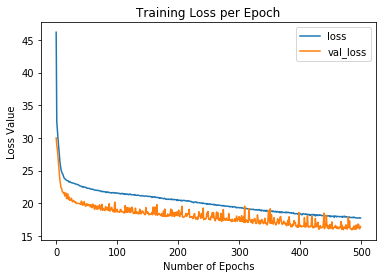

In [84]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title("Training Loss per Epoch");
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')

In [85]:
#true value of TEST
pred_df = model.predict(X_test)
pred_df = pd.Series(pred_df.reshape(2543,))
actual_df = pd.DataFrame(y_test,columns=['Test Y'])
actual_df = pd.concat([actual_df,pred_df],axis=1)
actual_df.columns = ['Test Y','Model Predictions_Test']
actual_df

Test Y  Model Predictions_Test
0          7                8.091096
1          4                4.177437
2          7                5.772391
3         16               11.661564
4         20               11.084389
...      ...                     ...
2538       6                8.255882
2539       5               11.668416
2540      12               15.616053
2541       6                8.382001
2542      10                9.810364

[2543 rows x 2 columns]

### Evaluation Model

In [72]:
import math
from sklearn.metrics import r2_score

y_true = actual_df['Test Y']
y_pred = actual_df['Model Predictions_Test']

#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(np.array(y_true), np.array(y_pred))

#RMSE
mse = sklearn.metrics.mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)

#R2 SCORE
r2 = r2_score(y_true, y_pred)


print("R2 SCORE: " + str(r2))
print("RMSE: " + str(rmse))
print("MAPE: " + str(mape) + (' %'))

R2 SCORE: 0.45425563653297907
RMSE: 4.039995724077675
MAPE: 34.11118576140884 %


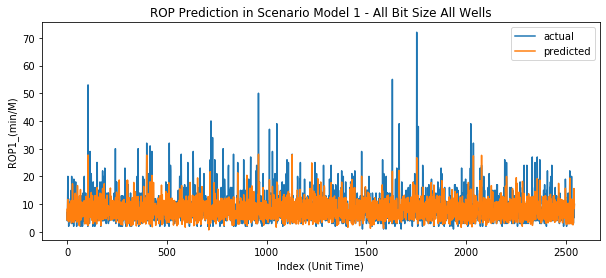

In [90]:
#Grafik perbandingan Prediksi dengan Aktual
plt.figure(figsize = (10,4))
line_chart1 = plt.plot(y_true)
line_chart2 = plt.plot(y_pred)
plt.title('ROP Prediction in Scenario Model 1 - All Bit Size All Wells')
plt.xlabel('Index (Unit Time)')
plt.ylabel('ROP1_(min/M)')
plt.legend(['actual', 'predicted'], loc=1)
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

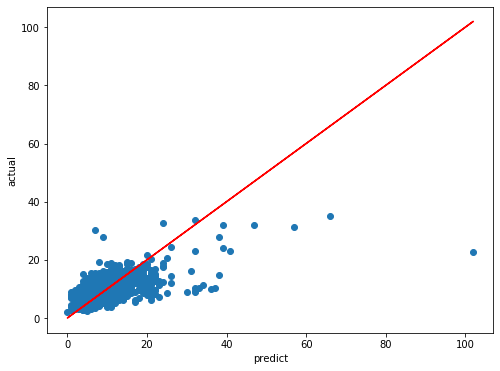

In [238]:
plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred)

# Line to Perfect predictions
plt.xlabel('predict')
plt.ylabel('actual')
plt.plot(y_test,y_test,'r')
plt.plot

In [72]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Output')
os.getcwd()
#save ke csv
actual_df.to_csv('prediksi_rop_ann_sken1_1LAYER_allwells.csv', header = ['Test Y','Model Predictions_Test'], index = False)

### Save and Load the Model ANN

In [100]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Output')
os.getcwd()

'C:\\Users\\Anisa Gemelia\\Documents\\Dokumen Kuliah\\Tugas Akhir\\Output'

In [102]:
#save ke csv
df_output.to_csv('prediksi_rop_ann_sken1_allwells.csv', header = ['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)', 'rop_pred'], index = False)

In [ ]:
#save model into pkl file
from tensorflow.keras.models import load_model
model.save('model_ann.h5')  # creates a HDF5 file 'my_model.h5'